<a href="https://colab.research.google.com/github/Niwanka/footballPrediction/blob/main/PremierLeague.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#Loading the dataset
data_frame = pd.read_csv('https://raw.githubusercontent.com/Niwanka/footballPrediction/refs/heads/main/PremierLeague.csv')

In [3]:
#Displaying the dataframe
data_frame

Season  MatchWeek        Date            Time          HomeTeam  \
0      1993-1994          1  14/08/1993             NaN           Arsenal   
1      1993-1994          1  14/08/1993             NaN       Aston Villa   
2      1993-1994          1  14/08/1993             NaN           Chelsea   
3      1993-1994          1  14/08/1993             NaN         Liverpool   
4      1993-1994          1  14/08/1993             NaN          Man City   
...          ...        ...         ...             ...               ...   
11775  2023-2024         38  19/05/2024  04:00:00 p. m.    Crystal Palace   
11776  2023-2024         38  19/05/2024  04:00:00 p. m.         Liverpool   
11777  2023-2024         38  19/05/2024  04:00:00 p. m.             Luton   
11778  2023-2024         38  19/05/2024  04:00:00 p. m.          Man City   
11779  2023-2024         38  19/05/2024  04:00:00 p. m.  Sheffield United   

             AwayTeam  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0            Coventry                      0                      3   
1                 QPR                      4                      1   
2           Blackburn                      1                      2   
3      Sheffield Weds                      2                      0   
4               Leeds                      1                      1   
...               ...                    ...                    ...   
11775     Aston Villa                      5                      0   
11776          Wolves                      2                      0   
11777          Fulham                      2                      4   
11778        West Ham                      3                      1   
11779       Tottenham                      0                      3   

      FullTimeResult  HalfTimeHomeTeamGoals  ...  MarketMaxAwayTeam  \
0                  A                    NaN  ...                NaN   
1                  H                    NaN  ...                NaN   
2                  A                    NaN  ...                NaN   
3                  H                    NaN  ...                NaN   
4                  D                    NaN  ...                NaN   
...              ...                    ...  ...                ...   
11775              H                    2.0  ...               3.84   
11776              H                    2.0  ...              17.00   
11777              A                    1.0  ...               2.30   
11778              H                    2.0  ...              25.00   
11779              A                    0.0  ...               1.39   

      MarketAvgHomeTeam MarketAvgDraw  MarketAvgAwayTeam  \
0                   NaN           NaN                NaN   
1                   NaN           NaN                NaN   
2                   NaN           NaN                NaN   
3                   NaN           NaN                NaN   
4                   NaN           NaN                NaN   
...                 ...           ...                ...   
11775              1.87          4.28               3.67   
11776              1.16          8.71              14.55   
11777              2.92          3.95               2.23   
11778              1.10         11.72              21.81   
11779              7.32          6.04               1.35   

       MarketMaxOver2.5Goals  MarketMaxUnder2.5Goals  MarketAvgOver2.5Goals  \
0                        NaN                     NaN                    NaN   
1                        NaN                     NaN                    NaN   
2                        NaN                     NaN                    NaN   
3                        NaN                     NaN                    NaN   
4                        NaN                     NaN                    NaN   
...                      ...                     ...                    ...   
11775                   1.42                    3.12                   1.39   
11776                   1.

In [4]:
#Converting to datetime format
data_frame['Date'] = pd.to_datetime(data_frame['Date'], format='%d/%m/%Y')

#Filtering dataframe to get days above 2000-01-01
filtered_data_frame = data_frame[data_frame['Date'] > '2000-01-01']

#Displaying first rows
filtered_data_frame.head()

Season  MatchWeek       Date Time        HomeTeam     AwayTeam  \
2475  1999-2000         19 2000-01-03  NaN           Derby      Watford   
2476  1999-2000         19 2000-01-03  NaN         Everton    Leicester   
2477  1999-2000         19 2000-01-03  NaN           Leeds  Aston Villa   
2478  1999-2000         19 2000-01-03  NaN       Newcastle     West Ham   
2479  1999-2000         19 2000-01-03  NaN  Sheffield Weds      Arsenal   

      FullTimeHomeTeamGoals  FullTimeAwayTeamGoals FullTimeResult  \
2475                      2                      0              H   
2476                      2                      2              D   
2477                      1                      2              A   
2478                      2                      2              D   
2479                      1                      1              D   

      HalfTimeHomeTeamGoals  ...  MarketMaxAwayTeam MarketAvgHomeTeam  \
2475                    1.0  ...                NaN               NaN   
2476                    1.0  ...                NaN               NaN   
2477                    0.0  ...                NaN               NaN   
2478                    1.0  ...                NaN               NaN   
2479                    0.0  ...                NaN               NaN   

     MarketAvgDraw  MarketAvgAwayTeam  MarketMaxOver2.5Goals  \
2475           NaN                NaN                    NaN   
2476           NaN                NaN                    NaN   
2477           NaN                NaN                    NaN   
2478           NaN                NaN                    NaN   
2479           NaN                NaN                    NaN   

      MarketMaxUnder2.5Goals  MarketAvgOver2.5Goals  MarketAvgUnder2.5Goals  \
2475                     NaN                    NaN                     NaN   
2476                     NaN                    NaN                     NaN   
2477                     NaN                    NaN                     NaN   
2478                     NaN                    NaN                     NaN   
2479                     NaN                    NaN                     NaN   

      HomeTeamPoints  AwayTeamPoints  
2475               3               0  
2476               1               1  
2477               0               3  
2478               1               1  
2479               1               1  

[5 rows x 42 columns]

In [5]:
#Ensure date coulmn is in right format
filtered_data_frame['Date'] = pd.to_datetime(filtered_data_frame['Date'])

#Extracting Year and month from date
filtered_data_frame['Year'] = filtered_data_frame['Date'].dt.year
filtered_data_frame['Month'] = filtered_data_frame['Date'].dt.month

<ipython-input-5-f1e496a12959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame['Date'] = pd.to_datetime(filtered_data_frame['Date'])
<ipython-input-5-f1e496a12959>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_frame['Year'] = filtered_data_frame['Date'].dt.year
<ipython-input-5-f1e496a12959>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

<ipython-input-6-9411d4b2411b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='MatchCount', data=matches_per_year, palette='Blues_d')


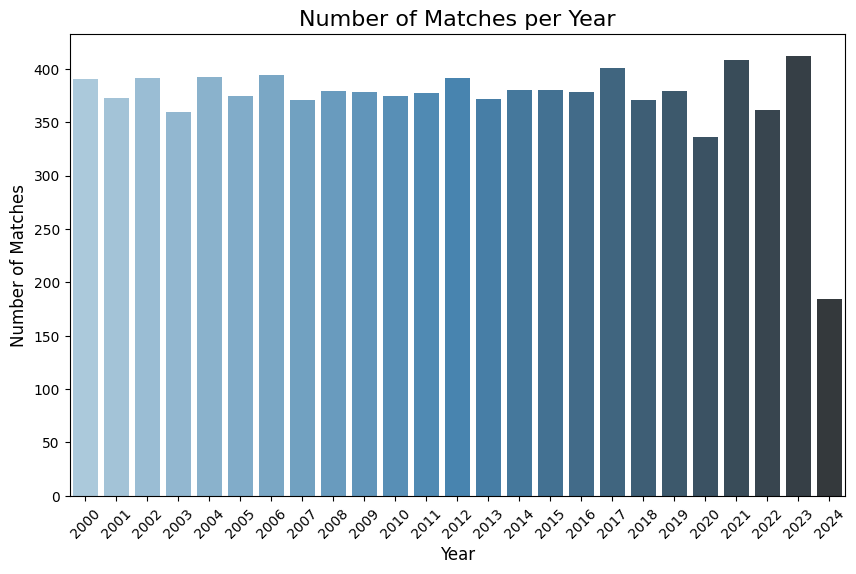

In [6]:

# Group by the 'Year' column and count the number of matches per year
matches_per_year = filtered_data_frame.groupby('Year').size().reset_index(name='MatchCount')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='MatchCount', data=matches_per_year, palette='Blues_d')
plt.title('Number of Matches per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [7]:
#Drop date coulmn from filtered data frame
filtered_data_frame = filtered_data_frame.drop('Date', axis=1)

In [8]:
#Define the list of columns
columns = [
    'Season', 'MatchWeek', 'Year', 'Month', 'Time', 'HomeTeam', 'AwayTeam',
    'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
    'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult',
    'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
    'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners',
    'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards',
    'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw',
    'B365AwayTeam', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
    'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw',
    'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals',
    'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'
]


In [9]:
#Displaying shape of the dataframe
filtered_data_frame.shape

(9305, 43)

In [10]:
#Displaying name of the coulmns in dataframe
filtered_data_frame.columns

Index(['Season', 'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
       'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult',
       'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners',
       'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards',
       'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards',
       'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals',
       'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw',
       'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw',
       'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals',
       'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints', 'Year', 'Month'],
      dtype='object')

In [11]:
#Counting unique value occurances in HomeTeam column
filtered_data_frame["HomeTeam"].value_counts()

HomeTeam
Everton             466
Tottenham           466
Chelsea             466
Man United          465
Arsenal             464
Liverpool           464
Man City            437
Newcastle           428
West Ham            409
Aston Villa         408
Fulham              323
Southampton         314
Sunderland          274
West Brom           247
Leicester           236
Crystal Palace      228
Bolton              209
Blackburn           209
Middlesbrough       199
Stoke               190
Wolves              190
Burnley             171
Wigan               152
Watford             142
Leeds               142
Charlton            133
Swansea             133
Bournemouth         133
Birmingham          133
Brighton            133
Portsmouth          133
Norwich             133
Hull                 95
Sheffield United     76
Derby                66
Reading              57
QPR                  57
Brentford            57
Ipswich              38
Cardiff              38
Huddersfield         38
Nott'm Forest        38
Bradford             29
Coventry             28
Blackpool            19
Luton                19
Sheffield Weds       11
Wimbledon             9
Name: count, dtype: int64

In [12]:
#Calculating the null counts per column
null_counts = filtered_data_frame.isnull().sum()

# Total null values in the entire DataFrame
total_null_values = filtered_data_frame.isnull().sum().sum()

print("Null counts per column:\n", null_counts)
print("\nTotal null values in the DataFrame:", total_null_values)

Null counts per column:
 Season                       0
MatchWeek                    0
Time                      7405
HomeTeam                     0
AwayTeam                     0
FullTimeHomeTeamGoals        0
FullTimeAwayTeamGoals        0
FullTimeResult               0
HalfTimeHomeTeamGoals        0
HalfTimeAwayTeamGoals        0
HalfTimeResult               0
Referee                    185
HomeTeamShots              185
AwayTeamShots              185
HomeTeamShotsOnTarget      185
AwayTeamShotsOnTarget      185
HomeTeamCorners            185
AwayTeamCorners            185
HomeTeamFouls              185
AwayTeamFouls              185
HomeTeamYellowCards        185
AwayTeamYellowCards        185
HomeTeamRedCards           185
AwayTeamRedCards           185
B365HomeTeam               945
B365Draw                   945
B365AwayTeam               945
B365Over2.5Goals          6402
B365Under2.5Goals         6402
MarketMaxHomeTeam         7405
MarketMaxDraw             7405
MarketMaxAwayT

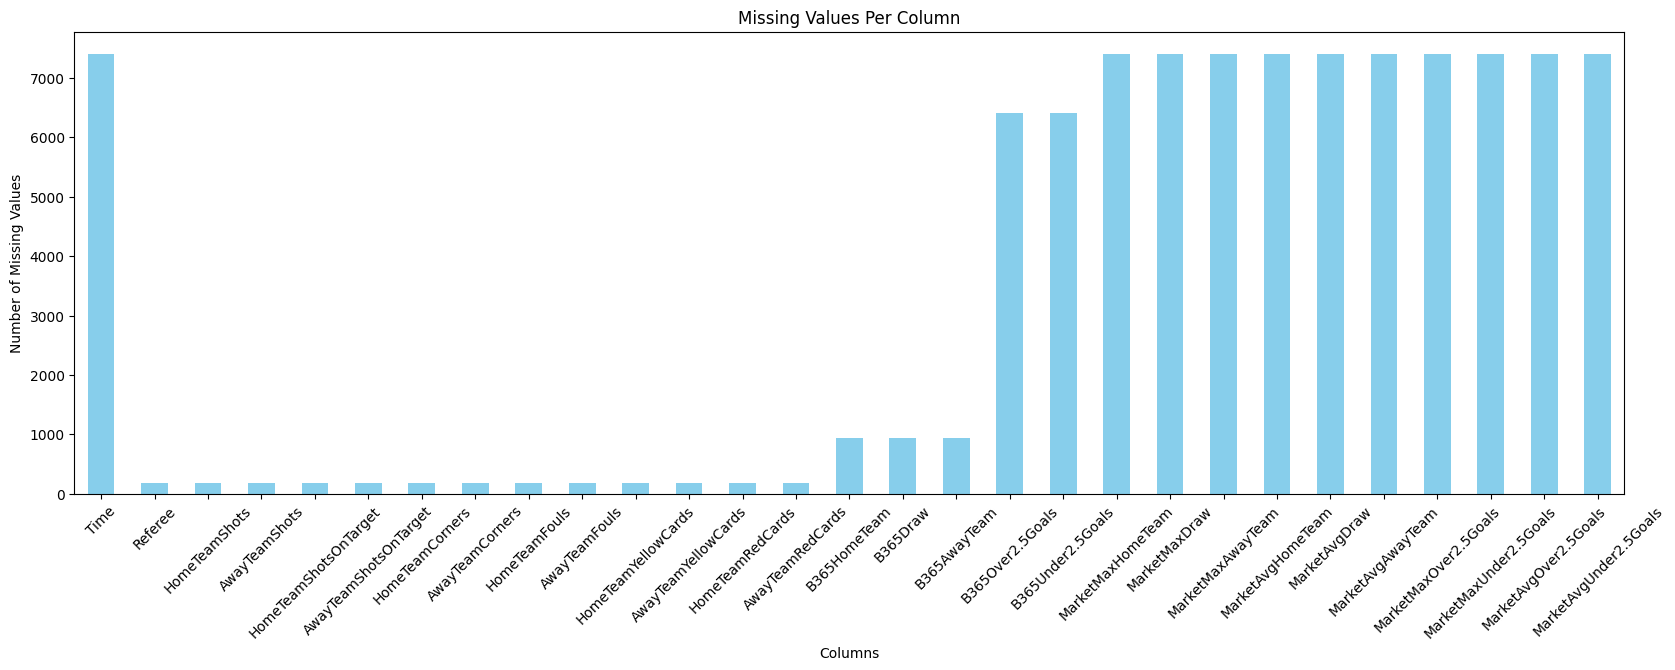

In [13]:
# Count missing values in each column
missing_values = filtered_data_frame.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plotting the bar chart for missing values
plt.figure(figsize=(20, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values Per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

In [14]:
#Check coulmns for null values
columns_to_check = filtered_data_frame.loc[:, 'Referee':'AwayTeamRedCards'].columns

# Drop rows where any of these columns have null values
df_cleaned = filtered_data_frame.dropna(subset=columns_to_check)

# Check the result
print(df_cleaned.isnull().sum())


Season                       0
MatchWeek                    0
Time                      7220
HomeTeam                     0
AwayTeam                     0
FullTimeHomeTeamGoals        0
FullTimeAwayTeamGoals        0
FullTimeResult               0
HalfTimeHomeTeamGoals        0
HalfTimeAwayTeamGoals        0
HalfTimeResult               0
Referee                      0
HomeTeamShots                0
AwayTeamShots                0
HomeTeamShotsOnTarget        0
AwayTeamShotsOnTarget        0
HomeTeamCorners              0
AwayTeamCorners              0
HomeTeamFouls                0
AwayTeamFouls                0
HomeTeamYellowCards          0
AwayTeamYellowCards          0
HomeTeamRedCards             0
AwayTeamRedCards             0
B365HomeTeam               760
B365Draw                   760
B365AwayTeam               760
B365Over2.5Goals          6217
B365Under2.5Goals         6217
MarketMaxHomeTeam         7220
MarketMaxDraw             7220
MarketMaxAwayTeam         7220
MarketAv

In [15]:

# Reset the index to avoid KeyError
df_cleaned.reset_index(drop=True, inplace=True)

# Function to calculate form for a team before a given match
def calculate_team_form_before_match(df, team, match_index, location, num_matches=5):
    """
    Calculate form for a team (home or away) before a specific match.

    Args:
    df (DataFrame): The full dataframe of match results.
    team (str): The team for which to calculate form.
    match_index (int): The index of the match for which we are calculating form.
    location (str): Either 'Home' or 'Away' to specify team type.
    num_matches (int): Number of previous matches to calculate form over.

    Returns:
    int: Form score based on the last 'num_matches' games before the match.
    """
    if location == 'Home':
        team_matches = df[(df['HomeTeam'] == team) & (df.index < match_index)].tail(num_matches)
        points = team_matches['FullTimeResult'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0)).sum()
    elif location == 'Away':
        team_matches = df[(df['AwayTeam'] == team) & (df.index < match_index)].tail(num_matches)
        points = team_matches['FullTimeResult'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0)).sum()
    else:
        points = 0
    return points

# Create new columns for HomeTeamForm and AwayTeamForm with loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'HomeTeamForm'] = 0
df_cleaned.loc[:, 'AwayTeamForm'] = 0

# Iterate over each match and calculate form for both home and away teams
for i in range(len(df_cleaned)):
    home_team = df_cleaned.loc[i, 'HomeTeam']
    away_team = df_cleaned.loc[i, 'AwayTeam']

    df_cleaned.loc[i, 'HomeTeamForm'] = calculate_team_form_before_match(df_cleaned, home_team, i, 'Home')
    df_cleaned.loc[i, 'AwayTeamForm'] = calculate_team_form_before_match(df_cleaned, away_team, i, 'Away')



<ipython-input-15-adb16c6d631e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'HomeTeamForm'] = 0
<ipython-input-15-adb16c6d631e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'AwayTeamForm'] = 0


In [16]:
# Print first 20 rows to verify the new columns
print(df_cleaned[['HomeTeam', 'HomeTeamForm', 'AwayTeam', 'AwayTeamForm']].head(20))

         HomeTeam  HomeTeamForm       AwayTeam  AwayTeamForm
0        Charlton             0       Man City             0
1         Chelsea             0       West Ham             0
2        Coventry             0  Middlesbrough             0
3           Derby             0    Southampton             0
4           Leeds             0        Everton             0
5       Leicester             0    Aston Villa             0
6       Liverpool             0       Bradford             0
7      Sunderland             0        Arsenal             0
8       Tottenham             0        Ipswich             0
9      Man United             0      Newcastle             0
10        Arsenal             0      Liverpool             0
11       Bradford             0        Chelsea             0
12        Ipswich             0     Man United             0
13  Middlesbrough             0      Tottenham             0
14        Everton             0       Charlton             0
15       Man City       

In [17]:
# Filter the dataframe for matches where "Man City" is either the home team or the away team
mancity_matches = df_cleaned[(df_cleaned['HomeTeam'] == 'Man City') | (df_cleaned['AwayTeam'] == 'Man City')]

# Display the last few matches
mancity_matches.tail(10)

Season  MatchWeek            Time        HomeTeam     AwayTeam  \
9032  2023-2024         30  04:30:00 p. m.        Man City      Arsenal   
9040  2023-2024         31  08:15:00 p. m.        Man City  Aston Villa   
9043  2023-2024         32  12:30:00 p. m.  Crystal Palace     Man City   
9056  2023-2024         33  03:00:00 p. m.        Man City        Luton   
9075  2023-2024         34  08:00:00 p. m.        Brighton     Man City   
9085  2023-2024         35  04:30:00 p. m.   Nott'm Forest     Man City   
9092  2023-2024         36  05:30:00 p. m.        Man City       Wolves   
9097  2023-2024         37  12:30:00 p. m.          Fulham     Man City   
9107  2023-2024         37  08:00:00 p. m.       Tottenham     Man City   
9118  2023-2024         38  04:00:00 p. m.        Man City     West Ham   

      FullTimeHomeTeamGoals  FullTimeAwayTeamGoals FullTimeResult  \
9032                      0                      0              D   
9040                      4                      1              H   
9043                      2                      4              A   
9056                      5                      1              H   
9075                      0                      4              A   
9085                      0                      2              A   
9092                      5                      1              H   
9097                      0                      4              A   
9107                      0                      2              A   
9118                      3                      1              H   

      HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals  ... MarketMaxOver2.5Goals  \
9032                    0.0                    0.0  ...                  1.80   
9040                    2.0                    1.0  ...                  1.45   
9043                    1.0                    1.0  ...                  1.72   
9056                    1.0                    0.0  ...                  1.29   
9075                    0.0                    3.0  ...                  1.53   
9085                    0.0                    1.0  ...                  1.57   
9092                    3.0                    0.0  ...                  1.32   
9097                    0.0                    1.0  ...                  1.38   
9107                    0.0                    0.0  ...                  1.30   
9118                    2.0                    1.0  ...                  1.22   

     MarketMaxUnder2.5Goals  MarketAvgOver2.5Goals  MarketAvgUnder2.5Goals  \
9032                   2.19                   1.74                    2.12   
9040                   3.00                   1.41                    2.95   
9043                   2.36                   1.66                    2.25   
9056                   4.00                   1.26                    3.77   
9075                   2.70                   1.49                    2.63   
9085                   2.57                   1.53                    2.50   
9092                   3.73                   1.30                    3.52   
9097                   3.30                   1.34                    3.18   
9107                   4.00                   1.27                    3.79   
9118                   4.85                   1.20                    4.45   

      HomeTeamPoints  AwayTeamPoints  Year  Month  HomeTeamForm  AwayTeamForm  
9032               1               1  2024      3            13            12  
9040               3               0  2024      4            11            11  
9043               0               3  2024      4            10            13  
9056               3               0  2024      4            11             1  
9075               0               3  2024      4             8            13  
9085               0               3  2024      4             8            13  
9092               3               0  2024      5            13             5  
9097               0            

In [18]:
#Displaying data types of cleaned data frame
df_cleaned.dtypes

Season                     object
MatchWeek                   int64
Time                       object
HomeTeam                   object
AwayTeam                   object
FullTimeHomeTeamGoals       int64
FullTimeAwayTeamGoals       int64
FullTimeResult             object
HalfTimeHomeTeamGoals     float64
HalfTimeAwayTeamGoals     float64
HalfTimeResult             object
Referee                    object
HomeTeamShots             float64
AwayTeamShots             float64
HomeTeamShotsOnTarget     float64
AwayTeamShotsOnTarget     float64
HomeTeamCorners           float64
AwayTeamCorners           float64
HomeTeamFouls             float64
AwayTeamFouls             float64
HomeTeamYellowCards       float64
AwayTeamYellowCards       float64
HomeTeamRedCards          float64
AwayTeamRedCards          float64
B365HomeTeam              float64
B365Draw                  float64
B365AwayTeam              float64
B365Over2.5Goals          float64
B365Under2.5Goals         float64
MarketMaxHomeTeam         float64
MarketMaxDraw             float64
MarketMaxAwayTeam         float64
MarketAvgHomeTeam         float64
MarketAvgDraw             float64
MarketAvgAwayTeam         float64
MarketMaxOver2.5Goals     float64
MarketMaxUnder2.5Goals    float64
MarketAvgOver2.5Goals     float64
MarketAvgUnder2.5Goals    float64
HomeTeamPoints              int64
AwayTeamPoints              int64
Year                        int32
Month                       int32
HomeTeamForm                int64
AwayTeamForm                int64
dtype: object

In [19]:
#Encoding match results
df_cleaned.loc[(df_cleaned.FullTimeResult == 'A'),'FTR']=0
df_cleaned.loc[(df_cleaned.FullTimeResult == 'D'),'FTR']=1
df_cleaned.loc[(df_cleaned.FullTimeResult == 'H'),'FTR']=2

<ipython-input-19-df12954f0e8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[(df_cleaned.FullTimeResult == 'A'),'FTR']=0


In [20]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Map for labeling FTR values (0, 1, 2) back to their textual meanings
# ftr_labels = {0: 'Away Win', 1: 'Draw', 2: 'Home Win'}

# # Replace the encoded FTR values with labels for visualization
# df_cleaned['FTR_label'] = df_cleaned['FTR'].map(ftr_labels)

# # Countplot for Full Time Result (FTR) after encoding
# plt.figure(figsize=(8, 5))
# sns.countplot(x='FTR_label', data=df_cleaned, palette='coolwarm')
# plt.title("Distribution of Match Results (FTR)")
# plt.xlabel("Full-Time Result")
# plt.ylabel("Count")
# plt.show()


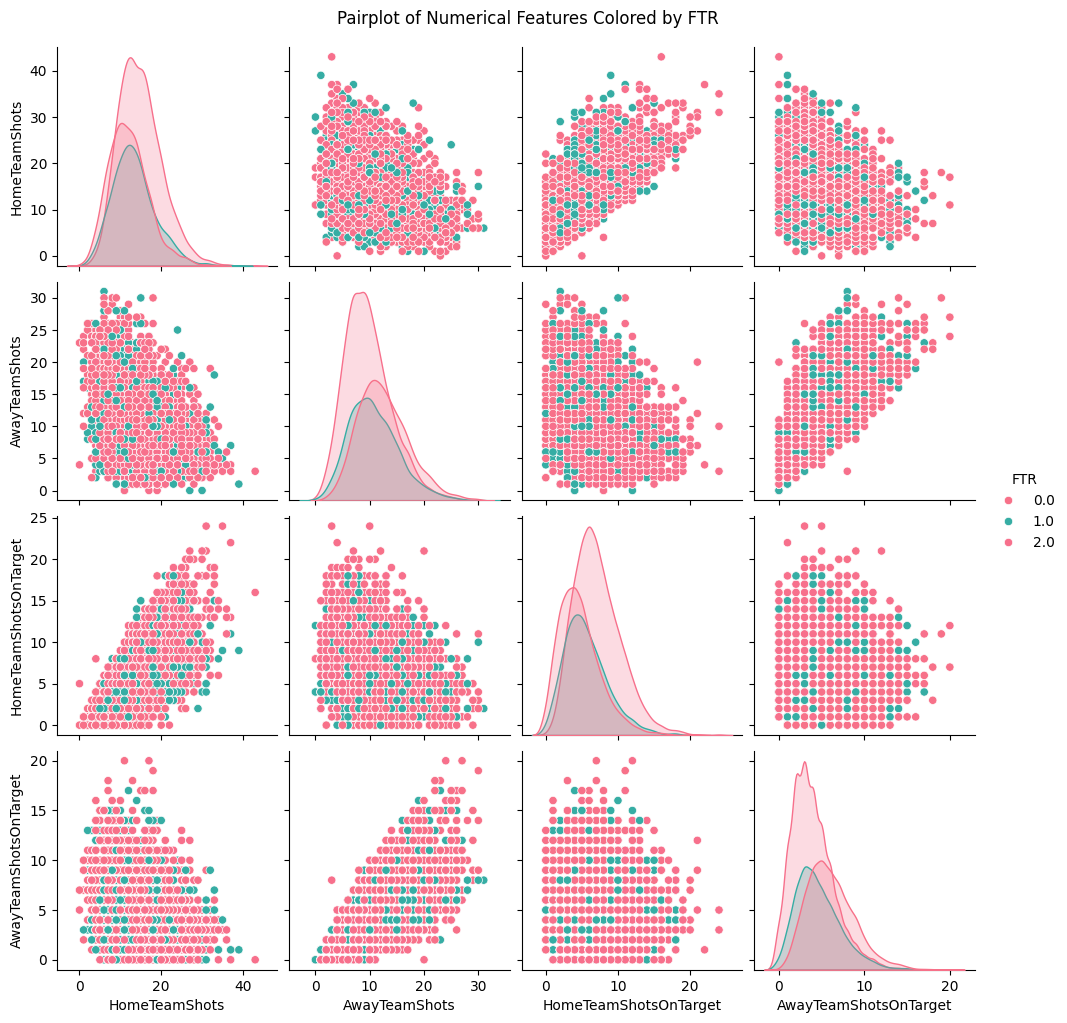

In [21]:
#Define numerical columns need to visualize
numerical_cols = ['HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']

# Create a pairplot for numerical features with 'FTR' as the hue
sns.pairplot(df_cleaned, hue='FTR', vars=numerical_cols, palette='husl')

# Show the plot
plt.suptitle("Pairplot of Numerical Features Colored by FTR", y=1.02)
plt.show()


In [22]:
#matches_filtered= matches_filtered.drop(columns=['Season','MatchWeek','Date','Time'])
#Dropping columns which no affect for correlation
corr_df= df_cleaned.drop(columns=['FullTimeHomeTeamGoals','FullTimeAwayTeamGoals','Season', 'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam','HalfTimeResult','FullTimeResult','Referee','HomeTeamPoints',
'AwayTeamPoints'])

#Calculate correlation matrix
correlation_matrix = corr_df.corr()

#Extract the correlation with the target
target_correlation = correlation_matrix['FTR']

#Output the correlations with target variable
print(target_correlation)

HalfTimeHomeTeamGoals     0.432858
HalfTimeAwayTeamGoals    -0.424911
HomeTeamShots             0.222607
AwayTeamShots            -0.255134
HomeTeamShotsOnTarget     0.318975
AwayTeamShotsOnTarget    -0.318969
HomeTeamCorners           0.051768
AwayTeamCorners          -0.044832
HomeTeamFouls            -0.033934
AwayTeamFouls             0.028358
HomeTeamYellowCards      -0.121349
AwayTeamYellowCards       0.029489
HomeTeamRedCards         -0.130381
AwayTeamRedCards          0.092745
B365HomeTeam             -0.366267
B365Draw                  0.163893
B365AwayTeam              0.340629
B365Over2.5Goals         -0.073068
B365Under2.5Goals         0.090365
MarketMaxHomeTeam        -0.361472
MarketMaxDraw             0.159261
MarketMaxAwayTeam         0.319011
MarketAvgHomeTeam        -0.371367
MarketAvgDraw             0.159930
MarketAvgAwayTeam         0.333848
MarketMaxOver2.5Goals    -0.095020
MarketMaxUnder2.5Goals    0.127023
MarketAvgOver2.5Goals    -0.093042
MarketAvgUnder2.5Goa

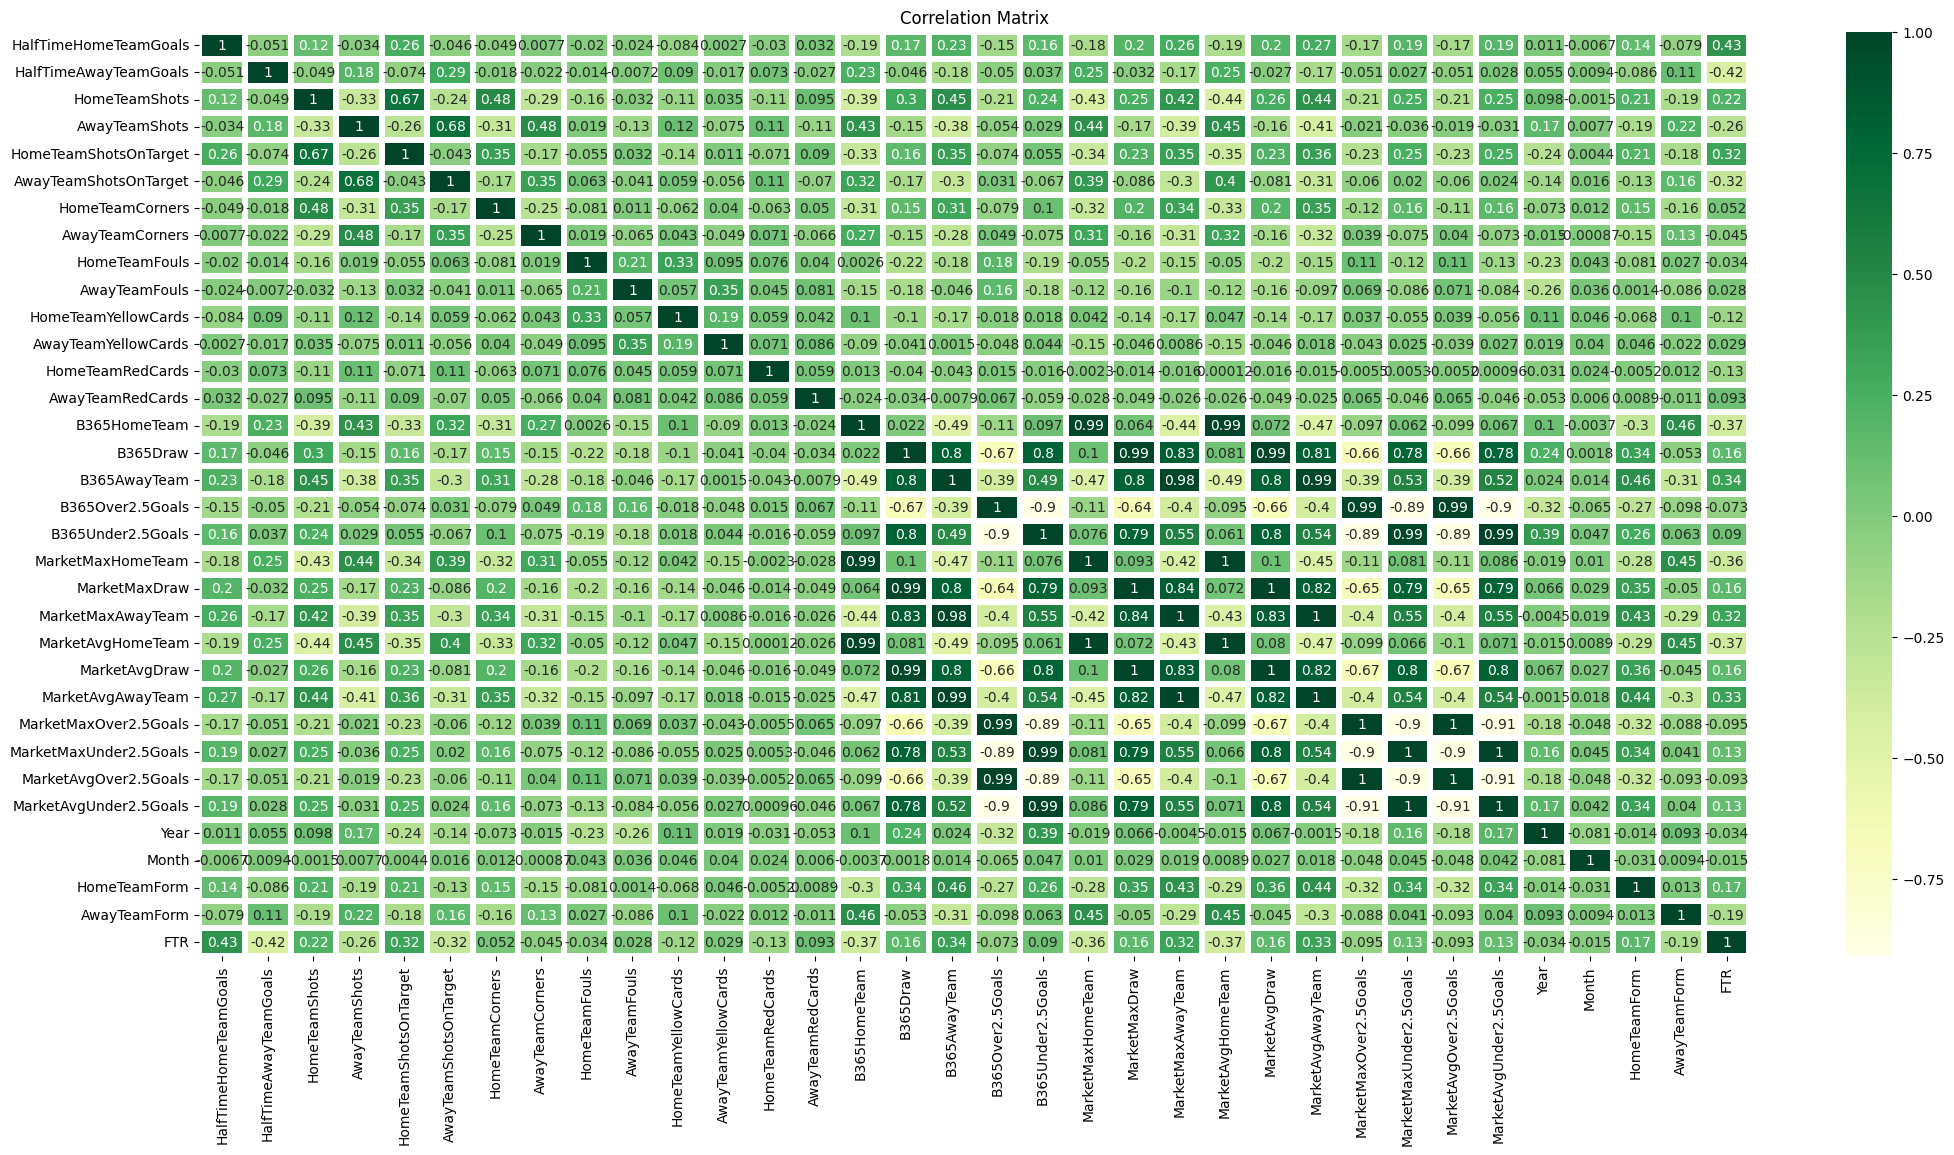

In [23]:
#Create and display heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, linewidth=3, cmap = "YlGn")
plt.title('Correlation Matrix')
plt.show()

In [24]:
#Define team list
teams = [
    'Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea',
    'Crystal Palace', 'Everton', 'Fulham', 'Ipswich', 'Leicester', 'Liverpool',
    'Man City', 'Man United', 'Newcastle', "Nott'm Forest", 'Southampton',
    'Tottenham', 'West Ham', 'Wolves'
]

In [25]:
#Filtering dataframe
filtered_df = df_cleaned[(df_cleaned['HomeTeam'].isin(teams)) | (df_cleaned['AwayTeam'].isin(teams))]

In [26]:
#Creating mapping for teams names
team_index_mapping = {team: index for index, team in enumerate(teams)}

In [27]:
filtered_df = df_cleaned[(df_cleaned['HomeTeam'].isin(teams)) | (df_cleaned['AwayTeam'].isin(teams))]

# Mapping teams to indices
filtered_df['HomeTeamIndex'] = filtered_df['HomeTeam'].map(team_index_mapping)
filtered_df['AwayTeamIndex'] = filtered_df['AwayTeam'].map(team_index_mapping)

# Displaying selected new coulmns
print(filtered_df[['HomeTeam', 'AwayTeam', 'HomeTeamIndex', 'AwayTeamIndex']])

              HomeTeam     AwayTeam  HomeTeamIndex  AwayTeamIndex
0             Charlton     Man City            NaN           12.0
1              Chelsea     West Ham            5.0           18.0
3                Derby  Southampton            NaN           16.0
4                Leeds      Everton            NaN            7.0
5            Leicester  Aston Villa           10.0            1.0
...                ...          ...            ...            ...
9115    Crystal Palace  Aston Villa            6.0            1.0
9116         Liverpool       Wolves           11.0           19.0
9117             Luton       Fulham            NaN            8.0
9118          Man City     West Ham           12.0           18.0
9119  Sheffield United    Tottenham            NaN           17.0

[8084 rows x 4 columns]


<ipython-input-27-f30b4b50c160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['HomeTeamIndex'] = filtered_df['HomeTeam'].map(team_index_mapping)
<ipython-input-27-f30b4b50c160>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AwayTeamIndex'] = filtered_df['AwayTeam'].map(team_index_mapping)


In [28]:
#Displaying first rows
filtered_df.head()

Season  MatchWeek Time   HomeTeam     AwayTeam  FullTimeHomeTeamGoals  \
0  2000-2001          1  NaN   Charlton     Man City                      4   
1  2000-2001          1  NaN    Chelsea     West Ham                      4   
3  2000-2001          1  NaN      Derby  Southampton                      2   
4  2000-2001          1  NaN      Leeds      Everton                      2   
5  2000-2001          1  NaN  Leicester  Aston Villa                      0   

   FullTimeAwayTeamGoals FullTimeResult  HalfTimeHomeTeamGoals  \
0                      0              H                    2.0   
1                      2              H                    1.0   
3                      2              D                    1.0   
4                      0              H                    2.0   
5                      0              D                    0.0   

   HalfTimeAwayTeamGoals  ... MarketAvgUnder2.5Goals HomeTeamPoints  \
0                    0.0  ...                    NaN              3   
1                    0.0  ...                    NaN              3   
3                    2.0  ...                    NaN              1   
4                    0.0  ...                    NaN              3   
5                    0.0  ...                    NaN              1   

   AwayTeamPoints  Year  Month  HomeTeamForm  AwayTeamForm  FTR  \
0               0  2000      8             0             0  2.0   
1               0  2000      8             0             0  2.0   
3               1  2000      8             0             0  1.0   
4               0  2000      8             0             0  2.0   
5               1  2000      8             0             0  1.0   

   HomeTeamIndex  AwayTeamIndex  
0            NaN           12.0  
1            5.0           18.0  
3            NaN           16.0  
4            NaN            7.0  
5           10.0            1.0  

[5 rows x 48 columns]

In [29]:
#Dropping unnecessary columns
corr_df_1= filtered_df.drop(columns=['B365Over2.5Goals'
,'B365Under2.5Goals'
,'MarketMaxHomeTeam'
,'MarketMaxDraw'
,'MarketMaxAwayTeam'
,'MarketAvgHomeTeam'
,'MarketAvgDraw'
,'HomeTeam', 'AwayTeam'
,'MarketAvgAwayTeam'
,'MarketMaxOver2.5Goals'
,'MarketMaxUnder2.5Goals'
,'MarketAvgOver2.5Goals'
,'MarketAvgUnder2.5Goals' ,'FullTimeHomeTeamGoals','FullTimeAwayTeamGoals','Season', 'MatchWeek', 'Time','HalfTimeResult','FullTimeResult','Referee','HomeTeamPoints',
'AwayTeamPoints'])

#Calculating correlation
correlation_matrix = corr_df_1.corr()

#Extract the correlation with the target
target_correlation = correlation_matrix['FTR']

#Output the correlations with target variable
print(target_correlation)

HalfTimeHomeTeamGoals    0.436834
HalfTimeAwayTeamGoals   -0.426697
HomeTeamShots            0.248076
AwayTeamShots           -0.277216
HomeTeamShotsOnTarget    0.344794
AwayTeamShotsOnTarget   -0.336537
HomeTeamCorners          0.069938
AwayTeamCorners         -0.059980
HomeTeamFouls           -0.035813
AwayTeamFouls            0.030827
HomeTeamYellowCards     -0.125750
AwayTeamYellowCards      0.030293
HomeTeamRedCards        -0.128482
AwayTeamRedCards         0.094652
B365HomeTeam            -0.384969
B365Draw                 0.176815
B365AwayTeam             0.359295
Year                    -0.037404
Month                   -0.011976
HomeTeamForm             0.188708
AwayTeamForm            -0.205830
FTR                      1.000000
HomeTeamIndex           -0.025480
AwayTeamIndex            0.046556
Name: FTR, dtype: float64


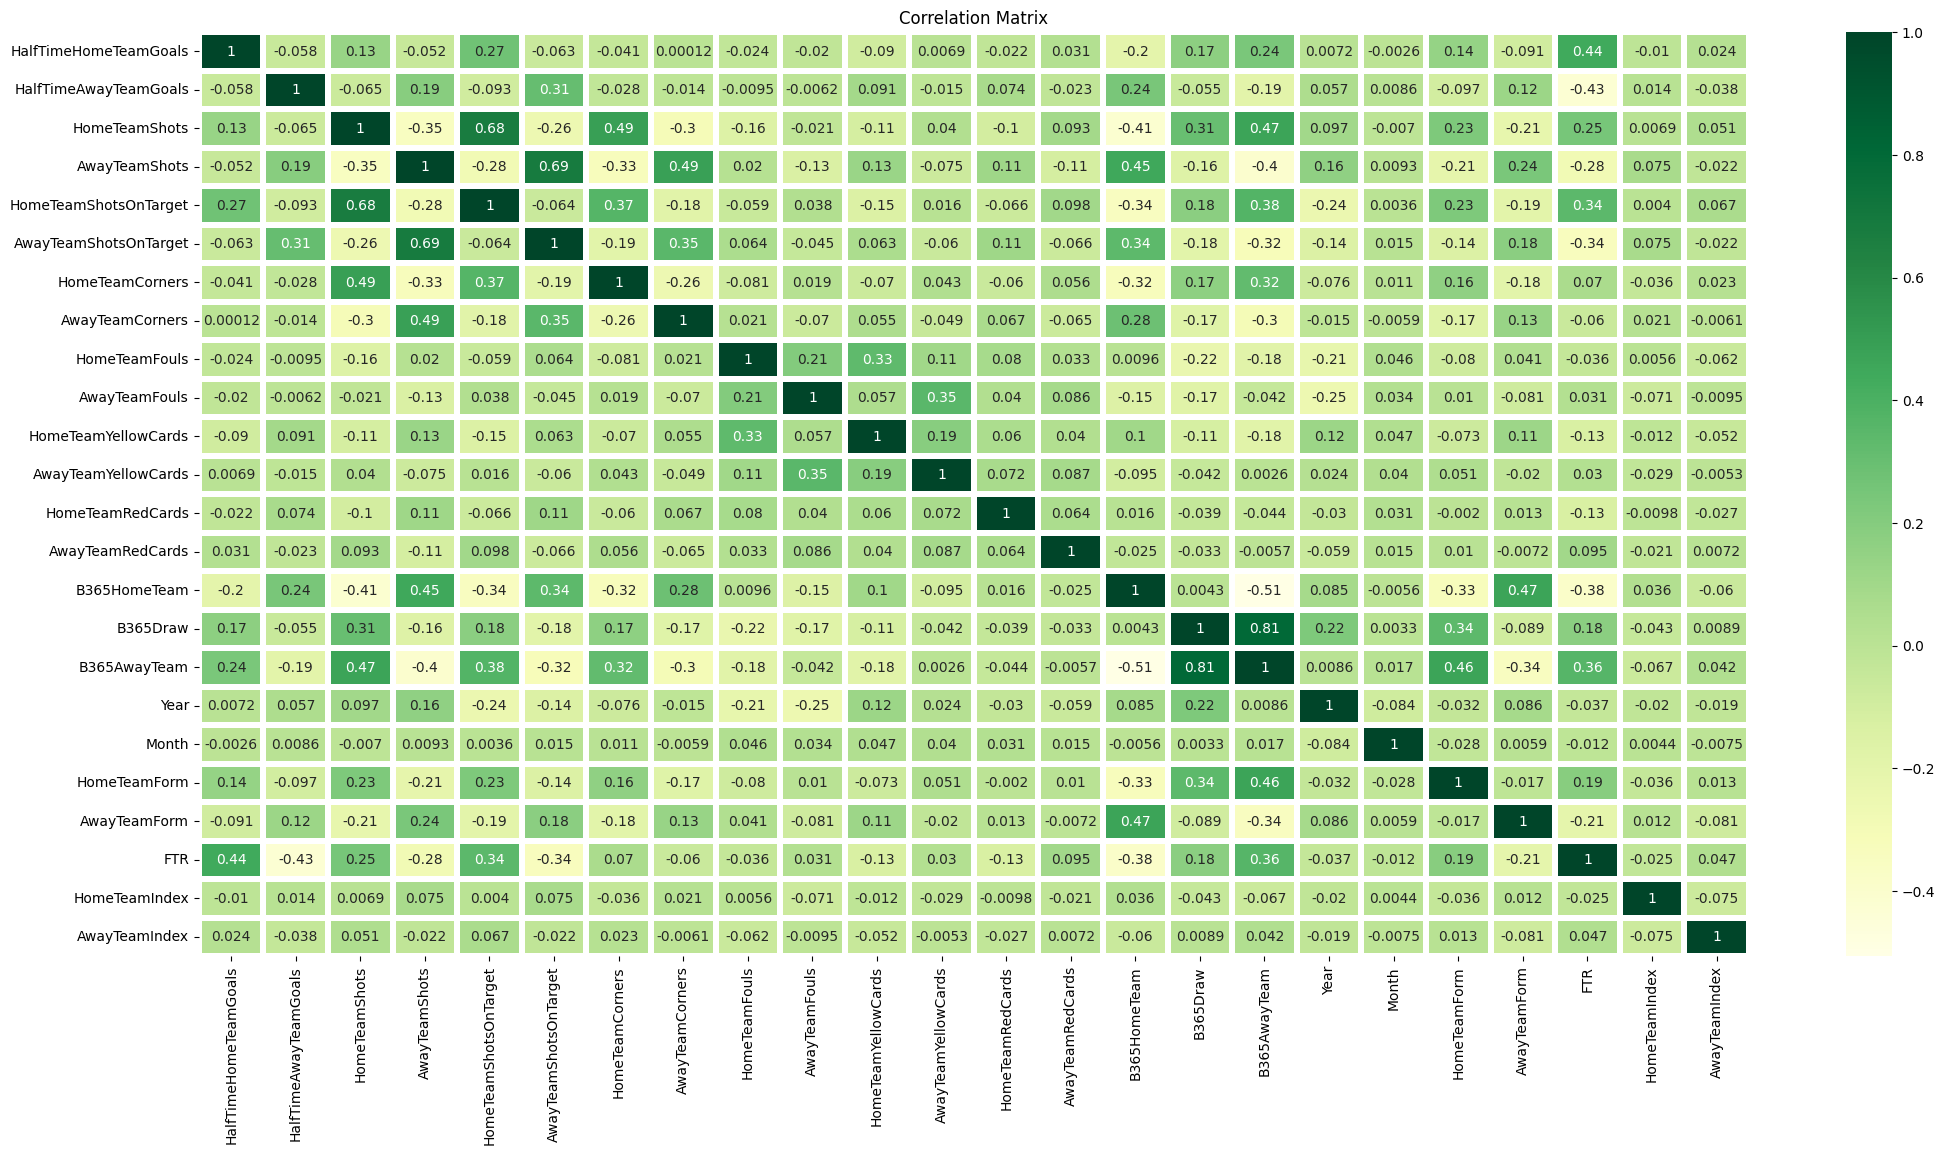

In [30]:
#Create and display heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, linewidth=3, cmap = "YlGn")
plt.title('Correlation Matrix')
plt.show()

In [31]:
#Counting home teams and styling dataframe
Hometeam=df_cleaned['HomeTeam'].value_counts().reset_index()
Hometeam.reset_index().style.background_gradient(cmap="CMRmap_r")

In [32]:
#Counting Awayteam and styling dataframe
Awayteam=df_cleaned['AwayTeam'].value_counts().reset_index()
Awayteam.reset_index().style.background_gradient(cmap="CMRmap_r")

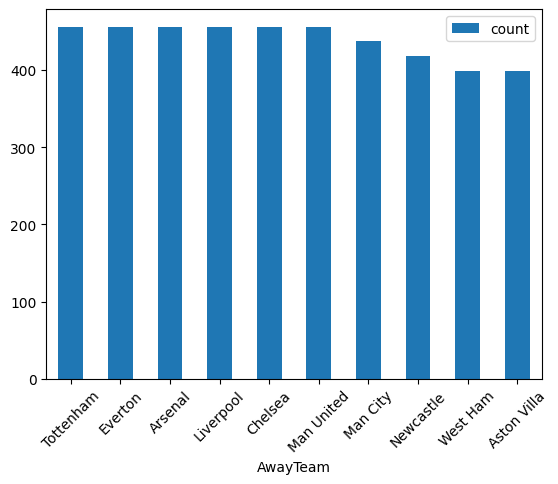

In [33]:
#Counting awayteam
df_cleaned['AwayTeam'].value_counts().reset_index().head(10).plot(kind='bar',x='AwayTeam',y='count')

#Plotting the barchart and formatting the plot
plt.xticks(rotation=45)
plt.show()

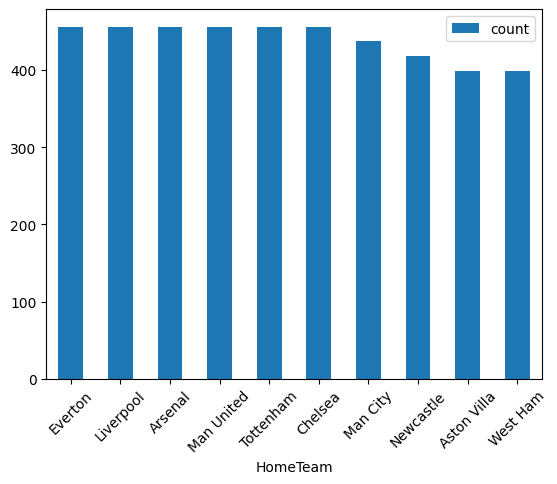

In [34]:
#Counting hometeams
df_cleaned['HomeTeam'].value_counts().reset_index().head(10).plot(kind='bar',x='HomeTeam',y='count')

#Plotting the barchart and formatting the plot
plt.xticks(rotation=45)
plt.show()

In [35]:
#Creating dummy variables
dummy_teams = pd.get_dummies(df_cleaned[['HomeTeam', 'AwayTeam']])

#Concatenating dummy variables
df_cleaned = pd.concat([df_cleaned, dummy_teams], axis=1)

#Dropping original coulmns
df_cleaned.drop(['HomeTeam', 'AwayTeam'], axis=1, inplace=True)

In [36]:
#Displaying dataframe first rows
df_cleaned.head()

Season  MatchWeek Time  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0  2000-2001          1  NaN                      4                      0   
1  2000-2001          1  NaN                      4                      2   
2  2000-2001          1  NaN                      1                      3   
3  2000-2001          1  NaN                      2                      2   
4  2000-2001          1  NaN                      2                      0   

  FullTimeResult  HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals HalfTimeResult  \
0              H                    2.0                    0.0              H   
1              H                    1.0                    0.0              H   
2              A                    1.0                    1.0              D   
3              D                    1.0                    2.0              A   
4              H                    2.0                    0.0              H   

            Referee  ...  AwayTeam_Southampton  AwayTeam_Stoke  \
0        Rob Harris  ...                 False           False   
1     Graham Barber  ...                 False           False   
2      Barry Knight  ...                 False           False   
3       Andy D'Urso  ...                  True           False   
4  Dermot Gallagher  ...                 False           False   

   AwayTeam_Sunderland  AwayTeam_Swansea  AwayTeam_Tottenham  \
0                False             False               False   
1                False             False               False   
2                False             False               False   
3                False             False               False   
4                False             False               False   

   AwayTeam_Watford  AwayTeam_West Brom  AwayTeam_West Ham  AwayTeam_Wigan  \
0             False               False              False           False   
1             False               False               True           False   
2             False               False              False           False   
3             False               False              False           False   
4             False               False              False           False   

   AwayTeam_Wolves  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 136 columns]

In [37]:
#Dropping unnecessary coulmns
corr_df_2= df_cleaned.drop(columns=['B365Over2.5Goals'
,'B365Under2.5Goals'
,'MarketMaxHomeTeam'
,'MarketMaxDraw'
,'MarketMaxAwayTeam'
,'MarketAvgHomeTeam'
,'MarketAvgDraw'
,'MarketAvgAwayTeam'
,'MarketMaxOver2.5Goals'
,'MarketMaxUnder2.5Goals'
,'MarketAvgOver2.5Goals'
,'MarketAvgUnder2.5Goals' ,'FullTimeHomeTeamGoals','FullTimeAwayTeamGoals','Season', 'MatchWeek', 'Time','HalfTimeResult','FullTimeResult','Referee','HomeTeamPoints',
'AwayTeamPoints'])

#Calculating correaltion
correlation_matrix = corr_df_2.corr()

#Extract the correlation with the target
target_correlation = correlation_matrix['FTR']

# Output the correlations with targert variable
print(target_correlation.to_string())

HalfTimeHomeTeamGoals        0.432858
HalfTimeAwayTeamGoals       -0.424911
HomeTeamShots                0.222607
AwayTeamShots               -0.255134
HomeTeamShotsOnTarget        0.318975
AwayTeamShotsOnTarget       -0.318969
HomeTeamCorners              0.051768
AwayTeamCorners             -0.044832
HomeTeamFouls               -0.033934
AwayTeamFouls                0.028358
HomeTeamYellowCards         -0.121349
AwayTeamYellowCards          0.029489
HomeTeamRedCards            -0.130381
AwayTeamRedCards             0.092745
B365HomeTeam                -0.366267
B365Draw                     0.163893
B365AwayTeam                 0.340629
Year                        -0.033519
Month                       -0.015314
HomeTeamForm                 0.172409
AwayTeamForm                -0.190603
FTR                          1.000000
HomeTeam_Arsenal             0.105652
HomeTeam_Aston Villa        -0.024980
HomeTeam_Birmingham         -0.009910
HomeTeam_Blackburn          -0.011124
HomeTeam_Bla

In [38]:
#Provide summary of the dataframe
corr_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Columns: 114 entries, HalfTimeHomeTeamGoals to AwayTeam_Wolves
dtypes: bool(92), float64(18), int32(2), int64(2)
memory usage: 2.3 MB


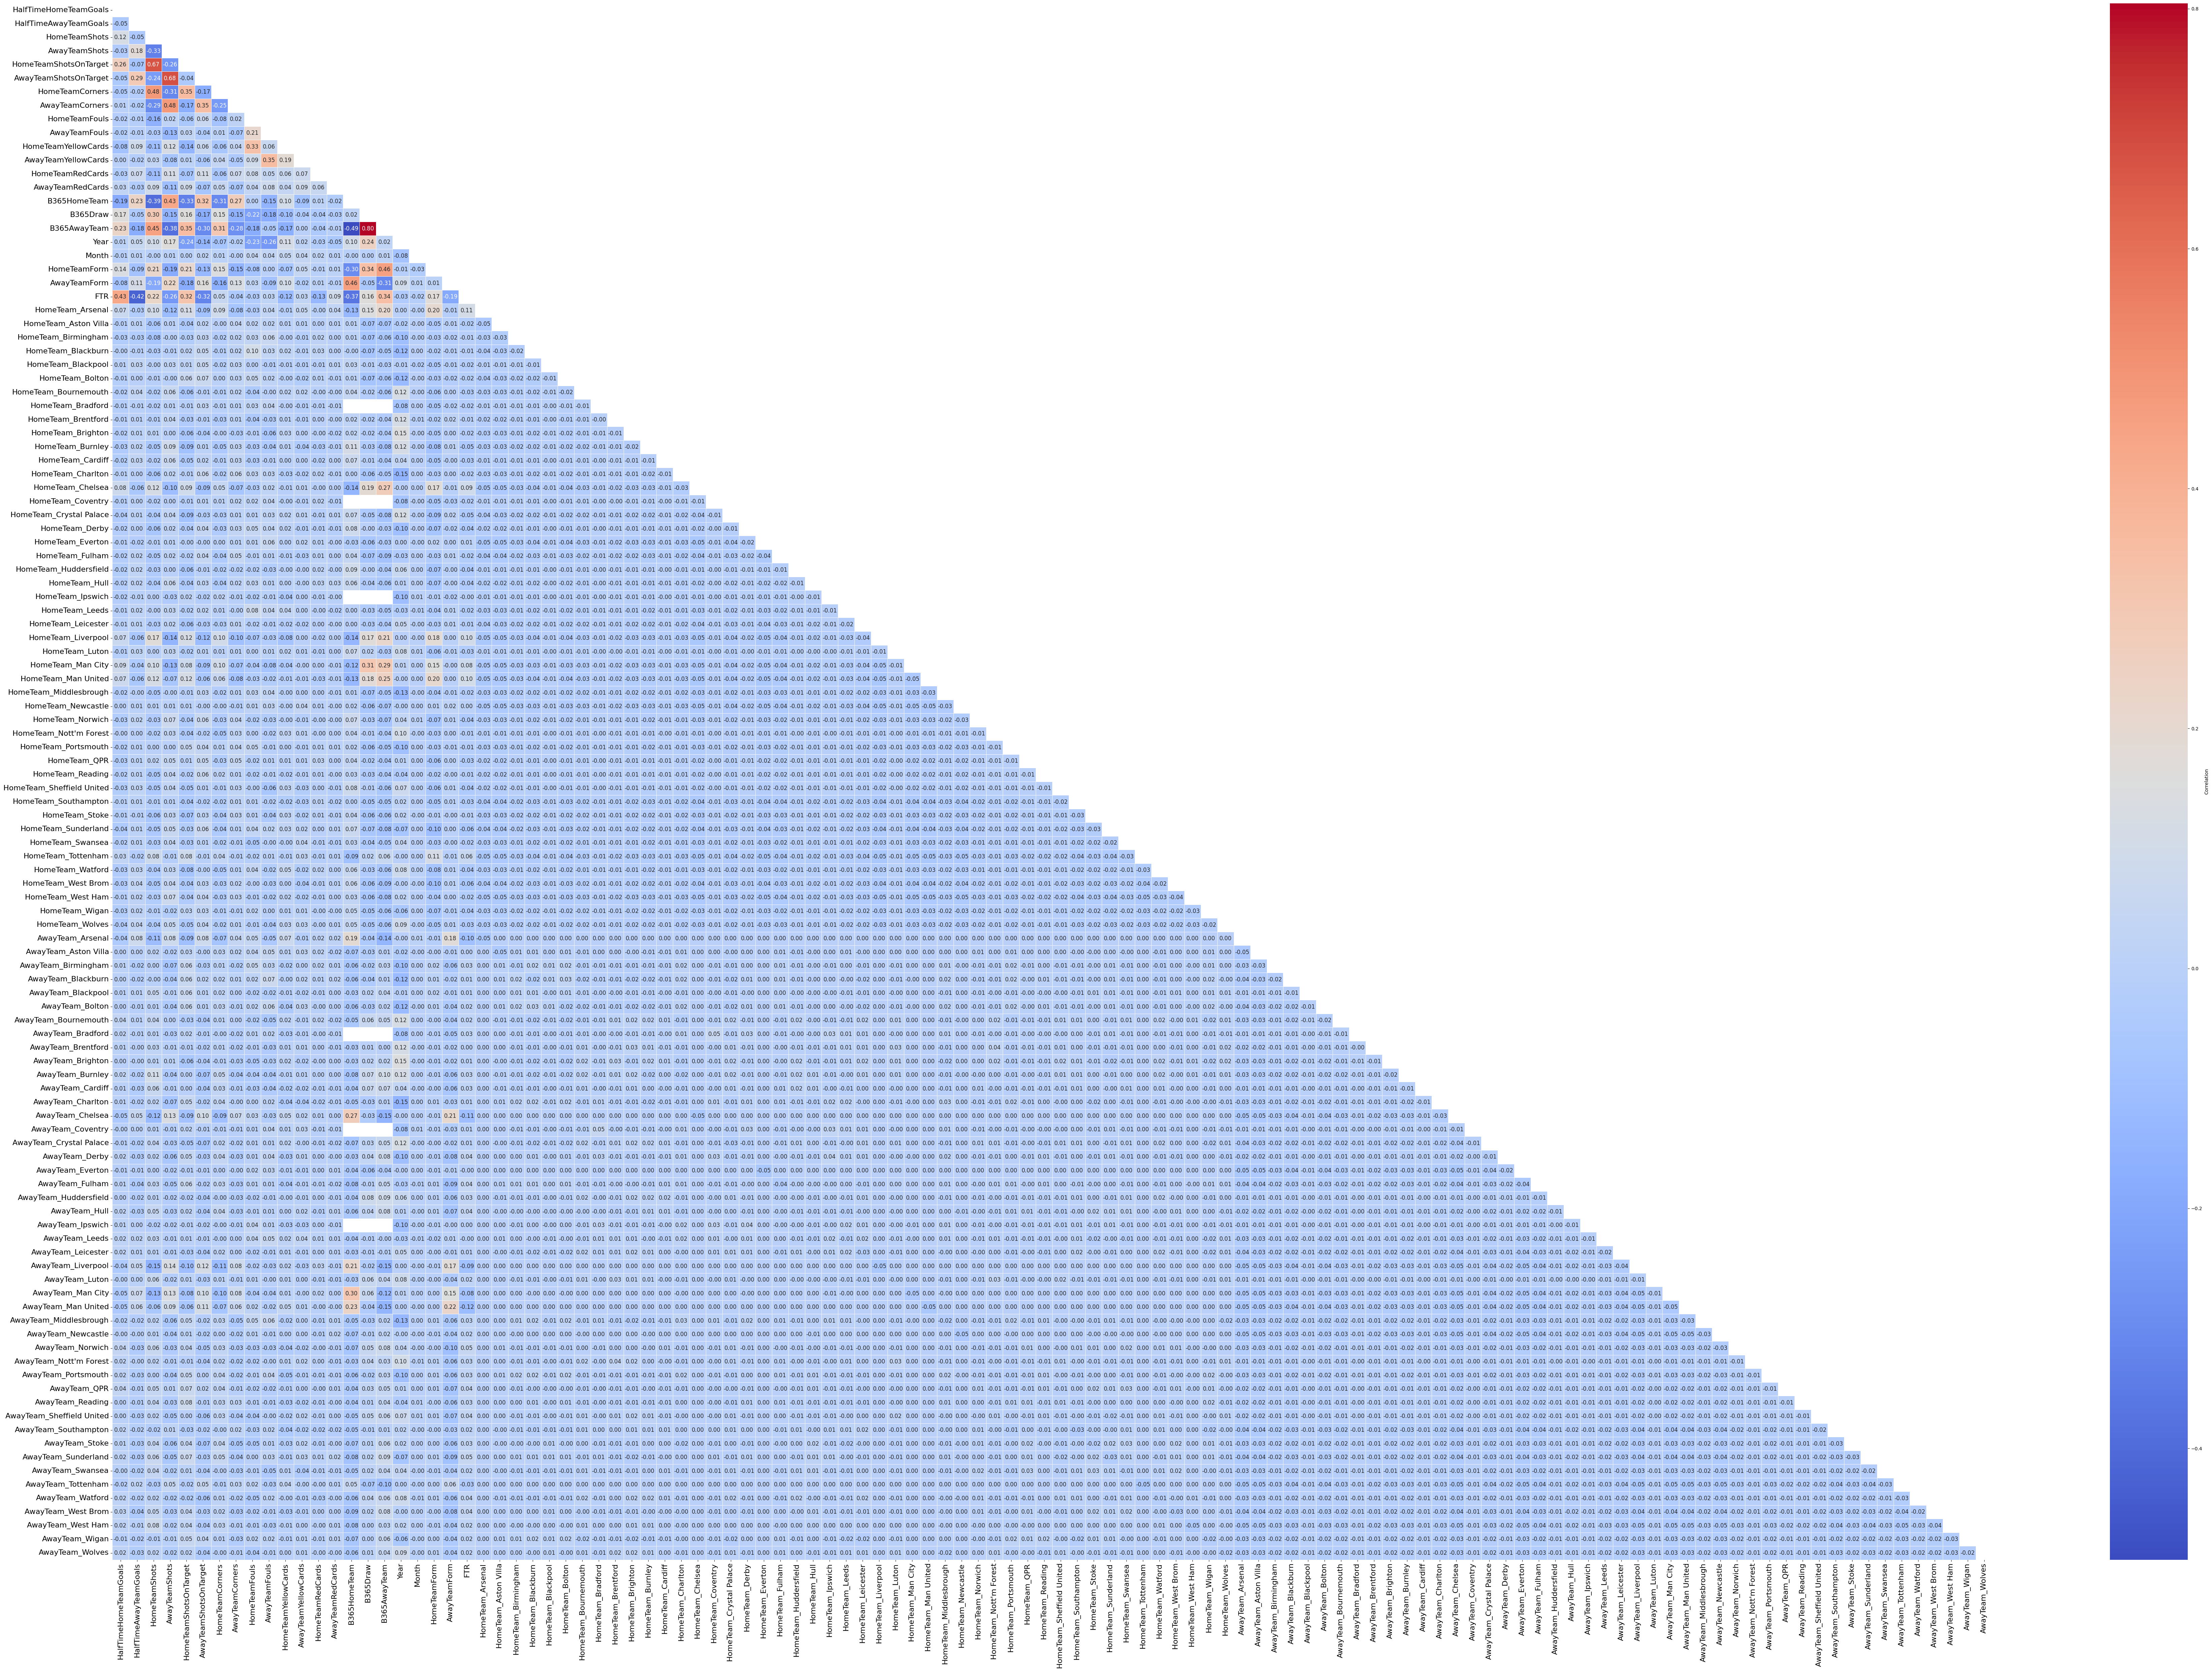

In [39]:

plt.figure(figsize=(90, 60))

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_df_2.corr(), dtype=bool))

#Create the heatmap
sns.heatmap(corr_df_2.corr(),
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"size": 12},
            mask=mask,
            cbar_kws={'label': 'Correlation'}
           )

# Rotate x-axis labels to avoid overlap and adjust font sizes
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=0, fontsize=16)

# Show plot
plt.show()



In [40]:
#Displaying columns
columns = corr_df_2.columns
print(columns)

Index(['HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HomeTeamShots',
       'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget',
       'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       ...
       'AwayTeam_Southampton', 'AwayTeam_Stoke', 'AwayTeam_Sunderland',
       'AwayTeam_Swansea', 'AwayTeam_Tottenham', 'AwayTeam_Watford',
       'AwayTeam_West Brom', 'AwayTeam_West Ham', 'AwayTeam_Wigan',
       'AwayTeam_Wolves'],
      dtype='object', length=114)


In [41]:
#Dropping columns
corr_df_3= corr_df_2.drop(columns=['HomeTeamYellowCards','AwayTeamYellowCards'])

In [42]:
#Printing each column name on a new line
list = []
for column in corr_df_3.columns:
    list.append(column)
print(list)


['HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'Year', 'Month', 'HomeTeamForm', 'AwayTeamForm', 'FTR', 'HomeTeam_Arsenal', 'HomeTeam_Aston Villa', 'HomeTeam_Birmingham', 'HomeTeam_Blackburn', 'HomeTeam_Blackpool', 'HomeTeam_Bolton', 'HomeTeam_Bournemouth', 'HomeTeam_Bradford', 'HomeTeam_Brentford', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Charlton', 'HomeTeam_Chelsea', 'HomeTeam_Coventry', 'HomeTeam_Crystal Palace', 'HomeTeam_Derby', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Hull', 'HomeTeam_Ipswich', 'HomeTeam_Leeds', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Luton', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Middlesbrough', 'HomeTeam_Newcastle', 'HomeTeam_Norwi

In [43]:
#Removing hometeam and awayteam from list
list.remove('AwayTeamForm')
list.remove('HomeTeamForm')
print(list)

['HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'Year', 'Month', 'FTR', 'HomeTeam_Arsenal', 'HomeTeam_Aston Villa', 'HomeTeam_Birmingham', 'HomeTeam_Blackburn', 'HomeTeam_Blackpool', 'HomeTeam_Bolton', 'HomeTeam_Bournemouth', 'HomeTeam_Bradford', 'HomeTeam_Brentford', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Charlton', 'HomeTeam_Chelsea', 'HomeTeam_Coventry', 'HomeTeam_Crystal Palace', 'HomeTeam_Derby', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Hull', 'HomeTeam_Ipswich', 'HomeTeam_Leeds', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Luton', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Middlesbrough', 'HomeTeam_Newcastle', 'HomeTeam_Norwich', "HomeTeam_Nott'm Forest", '

In [44]:
#Length of the list
len(list)

110

In [45]:
#Find unique rows based on specific columns
unique_team_combinations = corr_df_3.drop_duplicates(subset=list)

#Displaying unique rows based on these columns
print(unique_team_combinations)

      HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals  HomeTeamShots  \
0                       2.0                    0.0           17.0   
1                       1.0                    0.0           17.0   
2                       1.0                    1.0            6.0   
3                       1.0                    2.0            6.0   
4                       2.0                    0.0           17.0   
...                     ...                    ...            ...   
9115                    2.0                    0.0           15.0   
9116                    2.0                    0.0           36.0   
9117                    1.0                    2.0           15.0   
9118                    2.0                    1.0           28.0   
9119                    0.0                    1.0            6.0   

      AwayTeamShots  HomeTeamShotsOnTarget  AwayTeamShotsOnTarget  \
0               8.0                   14.0                    4.0   
1              12.0              

In [46]:
#Print first rows
df_cleaned.head()

Season  MatchWeek Time  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0  2000-2001          1  NaN                      4                      0   
1  2000-2001          1  NaN                      4                      2   
2  2000-2001          1  NaN                      1                      3   
3  2000-2001          1  NaN                      2                      2   
4  2000-2001          1  NaN                      2                      0   

  FullTimeResult  HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals HalfTimeResult  \
0              H                    2.0                    0.0              H   
1              H                    1.0                    0.0              H   
2              A                    1.0                    1.0              D   
3              D                    1.0                    2.0              A   
4              H                    2.0                    0.0              H   

            Referee  ...  AwayTeam_Southampton  AwayTeam_Stoke  \
0        Rob Harris  ...                 False           False   
1     Graham Barber  ...                 False           False   
2      Barry Knight  ...                 False           False   
3       Andy D'Urso  ...                  True           False   
4  Dermot Gallagher  ...                 False           False   

   AwayTeam_Sunderland  AwayTeam_Swansea  AwayTeam_Tottenham  \
0                False             False               False   
1                False             False               False   
2                False             False               False   
3                False             False               False   
4                False             False               False   

   AwayTeam_Watford  AwayTeam_West Brom  AwayTeam_West Ham  AwayTeam_Wigan  \
0             False               False              False           False   
1             False               False               True           False   
2             False               False              False           False   
3             False               False              False           False   
4             False               False              False           False   

   AwayTeam_Wolves  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 136 columns]

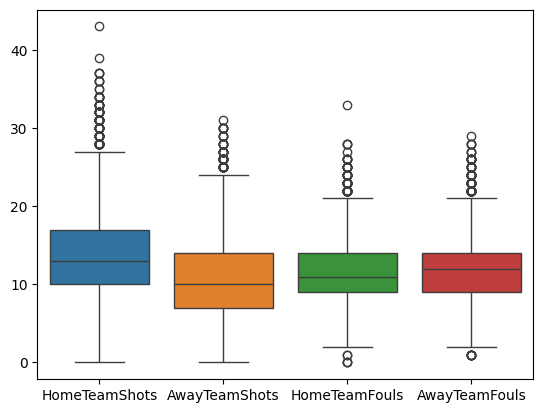

In [47]:
#Box plot for shots and fouls
sns.boxplot(data = df_cleaned[['HomeTeamShots', 'AwayTeamShots', 'HomeTeamFouls', 'AwayTeamFouls']])
plt.show()

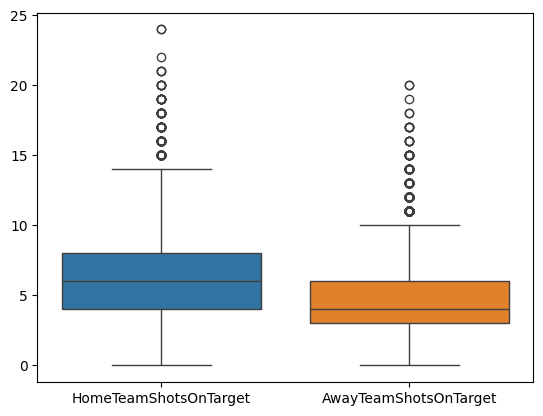

In [48]:
#Box plot for shots on target
sns.boxplot(data = df_cleaned[['HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']])
plt.show()

In [49]:
# IQR method for shots, fouls, and shots on target
Q1 = df_cleaned[['HomeTeamShots', 'AwayTeamShots', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']].quantile(0.25)
Q3 = df_cleaned[['HomeTeamShots', 'AwayTeamShots', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = (df_cleaned[['HomeTeamShots', 'AwayTeamShots', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']] < (Q1 - 1.5 * IQR)) | (df_cleaned[['HomeTeamShots', 'AwayTeamShots', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget']] > (Q3 + 1.5 * IQR))
data_no_outliers = df_cleaned[~outliers.any(axis=1)]

In [50]:
#Changed the FTR Column to last
FTR  = data_no_outliers['FTR']
data_no_outliers = data_no_outliers.drop('FTR',axis = 1)
data_no_outliers['FTR'] = FTR
data_no_outliers.columns

Index(['Season', 'MatchWeek', 'Time', 'FullTimeHomeTeamGoals',
       'FullTimeAwayTeamGoals', 'FullTimeResult', 'HalfTimeHomeTeamGoals',
       'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'Referee',
       ...
       'AwayTeam_Stoke', 'AwayTeam_Sunderland', 'AwayTeam_Swansea',
       'AwayTeam_Tottenham', 'AwayTeam_Watford', 'AwayTeam_West Brom',
       'AwayTeam_West Ham', 'AwayTeam_Wigan', 'AwayTeam_Wolves', 'FTR'],
      dtype='object', length=136)

In [51]:
#checking class balance
data_no_outliers['FTR'].value_counts()

FTR
2.0    3846
0.0    2385
1.0    2076
Name: count, dtype: int64

<Axes: xlabel='FTR'>

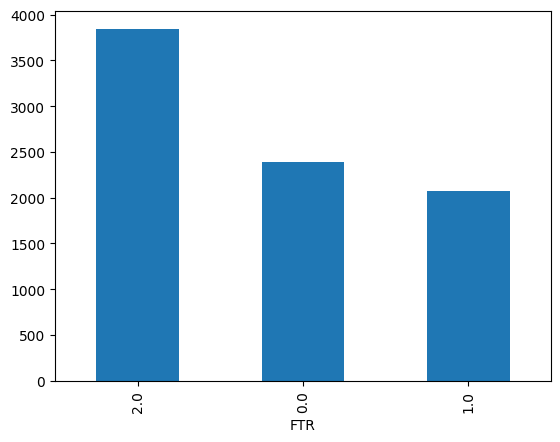

In [52]:
#Displaying class balance
data_no_outliers['FTR'].value_counts().plot(kind='bar')

In [53]:
#down smapling the majority class
df_majority = data_no_outliers[data_no_outliers['FTR'] == 0.0]
df_minority_1 = data_no_outliers[data_no_outliers['FTR'] == 1.0]
df_minority_2 = data_no_outliers[data_no_outliers['FTR'] == 2.0]


df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=2076,
                                   random_state=42)


df_balanced = pd.concat([df_majority_downsampled, df_minority_1, df_minority_2])


df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


print(df_balanced['FTR'].value_counts())

FTR
2.0    3846
1.0    2076
0.0    2076
Name: count, dtype: int64


<Axes: xlabel='FTR'>

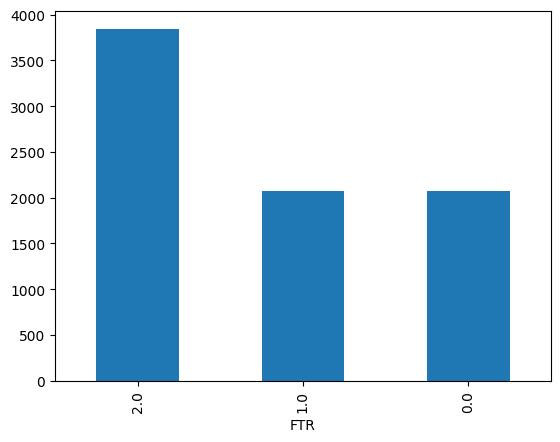

In [54]:
#Displying barchart
df_balanced['FTR'].value_counts().plot(kind='bar')

In [55]:
#dropped time column
df_balanced = df_balanced.drop('Time',axis = 1)

In [56]:
df_balanced

Season  MatchWeek  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0     2008-2009         12                      2                      1   
1     2005-2006         24                      0                      0   
2     2018-2019         10                      0                      0   
3     2011-2012          3                      3                      1   
4     2021-2022         16                      1                      0   
...         ...        ...                    ...                    ...   
7993  2006-2007         26                      1                      0   
7994  2007-2008         27                      1                      0   
7995  2014-2015          9                      1                      3   
7996  2021-2022         28                      5                      0   
7997  2019-2020         18                      2                      0   

     FullTimeResult  HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals  \
0                 H                    1.0                    0.0   
1                 D                    0.0                    0.0   
2                 D                    0.0                    0.0   
3                 H                    1.0                    0.0   
4                 H                    0.0                    0.0   
...             ...                    ...                    ...   
7993              H                    1.0                    0.0   
7994              H                    0.0                    0.0   
7995              A                    1.0                    2.0   
7996              H                    3.0                    0.0   
7997              H                    0.0                    0.0   

     HalfTimeResult       Referee  HomeTeamShots  ...  AwayTeam_Stoke  \
0                 H        H Webb           11.0  ...           False   
1                 D  I Williamson           12.0  ...           False   
2                 D    C Kavanagh           22.0  ...           False   
3                 H     L Probert           17.0  ...           False   
4                 D     S Attwell           20.0  ...           False   
...             ...           ...            ...  ...             ...   
7993              H         C Foy           17.0  ...           False   
7994              D        P Dowd           17.0  ...           False   
7995              A    A Marriner           14.0  ...           False   
7996              H     S Attwell           14.0  ...           False   
7997              D       L Mason           11.0  ...           False   

      AwayTeam_Sunderland  AwayTeam_Swansea  AwayTeam_Tottenham  \
0                   False             False               False   
1                   False             False               False   
2                   False             False               False   
3                   False             False               False   
4                   False             False               False   
...                   ...               ...                 ...   
7993                False             False               False   
7994                 True             False               False   
7995                False             False               False   
7996                False             False               False   
7997                False             False               False   

      AwayTeam_Watford  AwayTeam_West Brom  AwayTeam_West Ham  AwayTeam_Wigan  \
0                False               False              False           False   
1                False                True              False           False   
2                False               False              False           False   
3                False               False              False           False   
4                False               False              False           False   
...                ...                 ...                ...             ...   
7993             F

In [57]:
#Standardize Numerical Columns
numerical_columns = df_balanced.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
columns_to_standardize = numerical_columns.drop('FTR')
df_balanced[columns_to_standardize] = scaler.fit_transform(df_balanced[columns_to_standardize])


print(df_balanced.head())

      Season  MatchWeek  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0  2008-2009  -0.693177               0.338071              -0.084723   
1  2005-2006   0.399350              -1.211880              -1.001658   
2  2018-2019  -0.875265              -1.211880              -1.001658   
3  2011-2012  -1.512572               1.113046              -0.084723   
4  2021-2022  -0.329001              -0.436905              -1.001658   

  FullTimeResult  HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals HalfTimeResult  \
0              H               0.354769              -0.692975              H   
1              D              -0.839441              -0.692975              D   
2              D              -0.839441              -0.692975              D   
3              H               0.354769              -0.692975              H   
4              H              -0.839441              -0.692975              D   

        Referee  HomeTeamShots  ...  AwayTeam_Stoke  AwayTeam_Sunderland  

In [58]:
#Check for missing values and display counts
df_balanced.isna().sum()

Season                   0
MatchWeek                0
FullTimeHomeTeamGoals    0
FullTimeAwayTeamGoals    0
FullTimeResult           0
                        ..
AwayTeam_West Brom       0
AwayTeam_West Ham        0
AwayTeam_Wigan           0
AwayTeam_Wolves          0
FTR                      0
Length: 135, dtype: int64

In [59]:
# Converting columns to a list.
df_balanced_columns = df_balanced.columns.tolist()

In [60]:
#Displaying colunmns
print(df_balanced_columns)

['Season', 'MatchWeek', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints', 'Year', 'Month', 'HomeTeamForm', 'AwayTeamForm', 'HomeTeam_Arsenal', 'HomeTeam_Aston Villa', 'HomeTeam_Birmingham', 'HomeTeam_Blackburn', 'HomeTeam_Blackpool', 'HomeTeam_Bolton', 'HomeTeam_Bournemouth', 'HomeTeam_Bradford', 'HomeTeam_Brentford', 

### **Model training for pre match predictions**




In [61]:
#Creating new dataframe by dropping inrelevent coulmns
pre_match_df= df_balanced.drop(columns=['Season','FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals','FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots','HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards','HomeTeamRedCards', 'AwayTeamRedCards','B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'])

In [62]:
#Displaying datatypes of each columns
print(pre_match_df.dtypes.to_string())

MatchWeek                    float64
B365HomeTeam                 float64
B365Draw                     float64
B365AwayTeam                 float64
Year                           int32
Month                          int32
HomeTeamForm                 float64
AwayTeamForm                 float64
HomeTeam_Arsenal                bool
HomeTeam_Aston Villa            bool
HomeTeam_Birmingham             bool
HomeTeam_Blackburn              bool
HomeTeam_Blackpool              bool
HomeTeam_Bolton                 bool
HomeTeam_Bournemouth            bool
HomeTeam_Bradford               bool
HomeTeam_Brentford              bool
HomeTeam_Brighton               bool
HomeTeam_Burnley                bool
HomeTeam_Cardiff                bool
HomeTeam_Charlton               bool
HomeTeam_Chelsea                bool
HomeTeam_Coventry               bool
HomeTeam_Crystal Palace         bool
HomeTeam_Derby                  bool
HomeTeam_Everton                bool
HomeTeam_Fulham                 bool
H

In [63]:
X_pre_match = pre_match_df.drop(columns=['FTR'])  # Features
y_pre_match = df_balanced['FTR'] #Targert variable

In [64]:
#Check for missing values in feature dataframe
X_pre_match.isna().sum()

MatchWeek               0
B365HomeTeam          661
B365Draw              661
B365AwayTeam          661
Year                    0
                     ... 
AwayTeam_Watford        0
AwayTeam_West Brom      0
AwayTeam_West Ham       0
AwayTeam_Wigan          0
AwayTeam_Wolves         0
Length: 100, dtype: int64

In [65]:
# Splitting the dataset into training and testing sets
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X_pre_match, y_pre_match, test_size=0.2, random_state=42)


In [66]:
# Dropping rows with missing values
X_train_pre_clean = X_train_pre.dropna()
y_train_pre_clean = y_train_pre[X_train_pre_clean.index]

X_test_pre_clean = X_test_pre.dropna()
y_test_pre_clean = y_test_pre[X_test_pre_clean.index]

# Training a Random Forest model after dropping missing values
rf_pre_match = RandomForestClassifier(random_state=42)
rf_pre_match.fit(X_train_pre_clean, y_train_pre_clean)

# Predicting and evaluating the model
y_pred_pre_clean = rf_pre_match.predict(X_test_pre_clean)
print("Pre-Match Model Accuracy after dropping NaNs:", accuracy_score(y_test_pre_clean, y_pred_pre_clean))
print(classification_report(y_test_pre_clean, y_pred_pre_clean))


Pre-Match Model Accuracy after dropping NaNs: 0.5230978260869565
              precision    recall  f1-score   support

         0.0       0.45      0.38      0.41       364
         1.0       0.28      0.13      0.18       368
         2.0       0.59      0.79      0.67       740

    accuracy                           0.52      1472
   macro avg       0.44      0.43      0.42      1472
weighted avg       0.48      0.52      0.49      1472



## Model Training for match predictions

In [67]:
#Creating new dataframe for match prediction
in_match_df= df_balanced.drop(columns=['Season','FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals','FullTimeResult','HalfTimeResult','Referee','HomeTeamFouls','AwayTeamFouls', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamYellowCards', 'AwayTeamYellowCards','HomeTeamRedCards', 'AwayTeamRedCards', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'])

In [68]:
#Display datatypes of each column in dataframe
print(in_match_df.dtypes.to_string())

MatchWeek                    float64
HalfTimeHomeTeamGoals        float64
HalfTimeAwayTeamGoals        float64
HomeTeamShots                float64
AwayTeamShots                float64
HomeTeamShotsOnTarget        float64
AwayTeamShotsOnTarget        float64
B365HomeTeam                 float64
B365Draw                     float64
B365AwayTeam                 float64
Year                           int32
Month                          int32
HomeTeamForm                 float64
AwayTeamForm                 float64
HomeTeam_Arsenal                bool
HomeTeam_Aston Villa            bool
HomeTeam_Birmingham             bool
HomeTeam_Blackburn              bool
HomeTeam_Blackpool              bool
HomeTeam_Bolton                 bool
HomeTeam_Bournemouth            bool
HomeTeam_Bradford               bool
HomeTeam_Brentford              bool
HomeTeam_Brighton               bool
HomeTeam_Burnley                bool
HomeTeam_Cardiff                bool
HomeTeam_Charlton               bool
H

In [69]:
X_in_match =in_match_df.drop(columns=['FTR'])  # Features
y_in_match = in_match_df['FTR'] #Targert variables

In [70]:
# Splitting the dataset into training and testing sets
X_train_in, X_test_in, y_train_in, y_test_in = train_test_split(X_in_match, y_in_match, test_size=0.2, random_state=42)

In-Match Model Accuracy after dropping NaNs: 0.6474184782608695
              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       364
         1.0       0.45      0.28      0.35       368
         2.0       0.71      0.85      0.78       740

    accuracy                           0.65      1472
   macro avg       0.59      0.58      0.58      1472
weighted avg       0.62      0.65      0.63      1472

Confusion Matrix:
 [[217  74  73]
 [ 79 104 185]
 [ 53  55 632]]


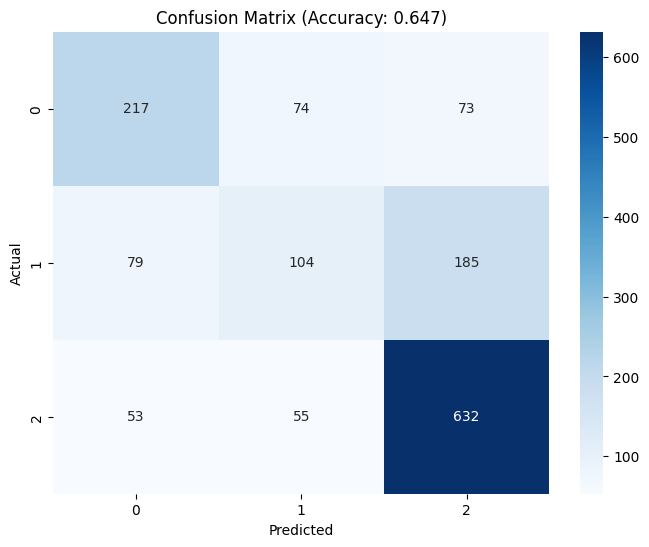

In [71]:
# Dropping rows with missing values
X_train_in_clean = X_train_in.dropna()
y_train_in_clean = y_train_in[X_train_in_clean.index]

X_test_in_clean = X_test_in.dropna()
y_test_in_clean = y_test_pre[X_test_in_clean.index]

# Training a Random Forest model after dropping missing values
rf_in_match = RandomForestClassifier(random_state=42)
rf_in_match.fit(X_train_in_clean, y_train_in_clean)

# Predicting and evaluating the model
y_pred_in_clean = rf_in_match.predict(X_test_in_clean)
print("In-Match Model Accuracy after dropping NaNs:", accuracy_score(y_test_in_clean, y_pred_in_clean))
print(classification_report(y_test_in_clean, y_pred_in_clean))

conf_matrix = confusion_matrix(y_test_in_clean, y_pred_in_clean)
print("Confusion Matrix:\n", conf_matrix)

accuracy= accuracy_score(y_test_in_clean, y_pred_in_clean)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [72]:
# Dropping rows with missing values
X_in_match = X_in_match.dropna()
y_in_match = y_in_match[X_in_match.index]

In [73]:
# Check the class distribution before SMOTE
print(f"Class distribution before SMOTE: {Counter(y_in_match)}")

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_in_match, y_in_match)

# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_resampled)}")

Class distribution before SMOTE: Counter({2.0: 3532, 0.0: 1909, 1.0: 1896})
Class distribution after SMOTE: Counter({2.0: 3532, 1.0: 3532, 0.0: 3532})


In [74]:
#Split the resampled dataset into training and validation sets.
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [75]:
#Initialize the XGBoost classifier with a multi-class classification objective and fit the model on the training data.
xgb_model_1 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_model_1.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [76]:
#Make predictions on the validation set
y_pred = xgb_model_1.predict( X_val_res)

print("In-Match Model Accuracy after dropping NaNs:", accuracy_score(y_val_res, y_pred))

#Evaluate the model
print(classification_report(y_val_res, y_pred))

In-Match Model Accuracy after dropping NaNs: 0.7372641509433963
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       723
         1.0       0.67      0.66      0.67       680
         2.0       0.75      0.75      0.75       717

    accuracy                           0.74      2120
   macro avg       0.74      0.74      0.74      2120
weighted avg       0.74      0.74      0.74      2120



In [77]:
'''from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Define the hyperparameter space
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
random_search.fit(X_train_res, y_train_res)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)'''

'from sklearn.model_selection import RandomizedSearchCV\nimport xgboost as xgb\n\n# Define the model\nmodel = xgb.XGBClassifier(objective=\'multi:softmax\', num_class=3, random_state=42)\n\n# Define the hyperparameter space\nparam_distributions = {\n    \'n_estimators\': [100, 200, 300, 400],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7, 9],\n    \'subsample\': [0.6, 0.7, 0.8, 0.9],\n    \'colsample_bytree\': [0.6, 0.7, 0.8, 0.9],\n    \'gamma\': [0, 0.1, 0.2, 0.3],\n    \'reg_alpha\': [0, 0.1, 0.5, 1],\n    \'reg_lambda\': [0.5, 1, 1.5, 2]\n}\n\n# Define the RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    model,\n    param_distributions=param_distributions,\n    n_iter=50,\n    scoring=\'accuracy\',\n    cv=3,\n    verbose=1,\n    random_state=42,\n    n_jobs=-1\n)\n\n# Fit the random search to the data\nrandom_search.fit(X_train_res, y_train_res)\n\n# Print the best parameters and best score\nprint("Best Parameters:", random_search.best_pa

In-Match Model Accuracy after dropping NaNs: 0.7613207547169811
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       723
         1.0       0.70      0.69      0.69       680
         2.0       0.76      0.78      0.77       717

    accuracy                           0.76      2120
   macro avg       0.76      0.76      0.76      2120
weighted avg       0.76      0.76      0.76      2120

Confusion Matrix:
 [[592  85  46]
 [ 85 466 129]
 [ 49 112 556]]


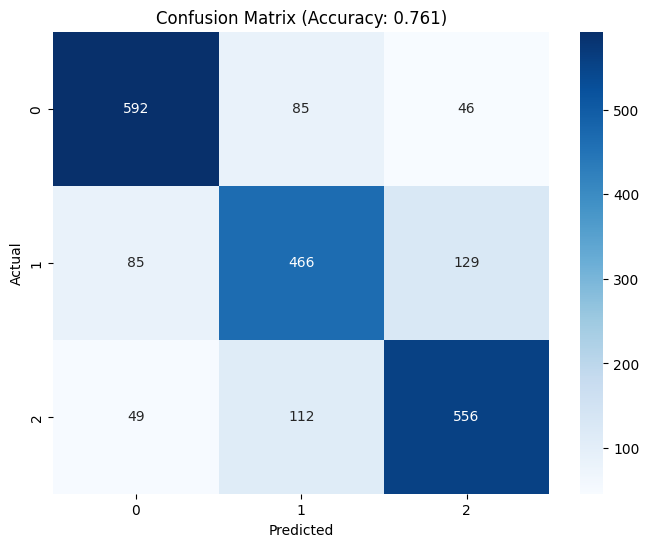

In [78]:


xgb_model_2 = xgb.XGBClassifier(
    colsample_bytree=0.8477854281978608,
    gamma=0.09862548308625246,
    learning_rate=0.13668017086334516,
    max_depth=7,
    n_estimators=300,
    reg_alpha=0.05372634167140701,
    reg_lambda=1.460119158983572,
    subsample=0.8754298317847461,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)


xgb_model_2.fit(X_train_res, y_train_res)


y_pred = xgb_model_2.predict( X_val_res)

print("In-Match Model Accuracy after dropping NaNs:", accuracy_score(y_val_res, y_pred))

# Evaluate the model
report = classification_report(y_val_res, y_pred)


print("Classification Report:\n", report)


conf_matrix = confusion_matrix(y_val_res, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy= accuracy_score(y_val_res, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [175]:
print(X_train_res.dtypes.to_string())



MatchWeek                    float64
HalfTimeHomeTeamGoals        float64
HalfTimeAwayTeamGoals        float64
HomeTeamShots                float64
AwayTeamShots                float64
HomeTeamShotsOnTarget        float64
AwayTeamShotsOnTarget        float64
B365HomeTeam                 float64
B365Draw                     float64
B365AwayTeam                 float64
Year                           int32
Month                          int32
HomeTeamForm                 float64
AwayTeamForm                 float64
HomeTeam_Arsenal                bool
HomeTeam_Aston Villa            bool
HomeTeam_Birmingham             bool
HomeTeam_Blackburn              bool
HomeTeam_Blackpool              bool
HomeTeam_Bolton                 bool
HomeTeam_Bournemouth            bool
HomeTeam_Bradford               bool
HomeTeam_Brentford              bool
HomeTeam_Brighton               bool
HomeTeam_Burnley                bool
HomeTeam_Cardiff                bool
HomeTeam_Charlton               bool
H

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6297169811320755
Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.65      0.67       723
         1.0       0.48      0.56      0.52       680
         2.0       0.76      0.68      0.71       717

    accuracy                           0.63      2120
   macro avg       0.64      0.63      0.63      2120
weighted avg       0.64      0.63      0.63      2120

Confusion Matrix:
 [[470 223  30]
 [172 381 127]
 [ 48 185 484]]


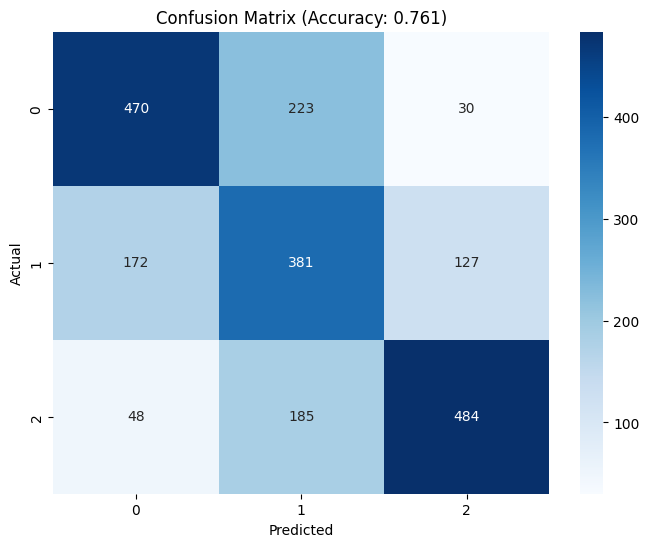

In [79]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    C=0.5,
    penalty='l2',
    max_iter=300,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_val_res)

print("Logistic Regression Accuracy:", accuracy_score(y_val_res, y_pred_lr))
print("Classification Report:\n", classification_report(y_val_res, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_val_res, y_pred_lr))


conf_matrix_lr= confusion_matrix(y_val_res, y_pred_lr)
accuracy_lr= accuracy_score(y_val_res, y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [80]:
from sklearn.svm import SVC

svc_model = SVC(
    kernel='rbf',
    C=1.5,
    gamma='scale',
    decision_function_shape='ovo',
    random_state=42
)

svc_model.fit(X_train_res, y_train_res)
y_pred_svc = svc_model.predict(X_val_res)

print("SVC Accuracy:", accuracy_score(y_val_res, y_pred_svc))
print("Classification Report:\n", classification_report(y_val_res, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_val_res, y_pred_svc))


SVC Accuracy: 0.32075471698113206
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       723
         1.0       0.32      1.00      0.49       680
         2.0       0.00      0.00      0.00       717

    accuracy                           0.32      2120
   macro avg       0.11      0.33      0.16      2120
weighted avg       0.10      0.32      0.16      2120

Confusion Matrix:
 [[  0 723   0]
 [  0 680   0]
 [  0 717   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [82]:
from sklearn.cluster import KMeans

# Drop target variable (since K-Means is unsupervised, it doesn't use labels)
 # Assuming 'FTR' is your target

in_match_df_clustering= in_match_df.dropna()
X = in_match_df_clustering.drop(columns=['FTR'])

# Scale the features for K-Means clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
# Set the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Here we use 3 clusters as an example
kmeans.fit(X_scaled)

# Get the cluster labels (which cluster each data point belongs to)
cluster_labels = kmeans.labels_

# Add the cluster labels back to the dataset for analysis
in_match_df_clustering['Cluster'] = cluster_labels

# Visualize the first few rows with cluster labels
print(in_match_df_clustering.head())

   MatchWeek  HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals  HomeTeamShots  \
0  -0.693177               0.354769              -0.692975      -0.503983   
1   0.399350              -0.839441              -0.692975      -0.297833   
2  -0.875265              -0.839441              -0.692975       1.763671   
3  -1.512572               0.354769              -0.692975       0.732919   
4  -0.329001              -0.839441              -0.692975       1.351371   

   AwayTeamShots  HomeTeamShotsOnTarget  AwayTeamShotsOnTarget  B365HomeTeam  \
0       1.543793               0.374505               1.950521      0.312144   
1       0.372393               1.045493               0.679105     -0.467391   
2      -1.033286              -0.631977              -1.863725     -0.319169   
3      -0.799006               1.045493              -0.168505     -0.703447   
4      -1.501846              -0.296483              -1.863725     -0.813240   

   B365Draw  B365AwayTeam  ...  AwayTeam_Sunderland  Awa

<ipython-input-83-2ec6ac5012aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_match_df_clustering['Cluster'] = cluster_labels


In [84]:
from sklearn.decomposition import PCA

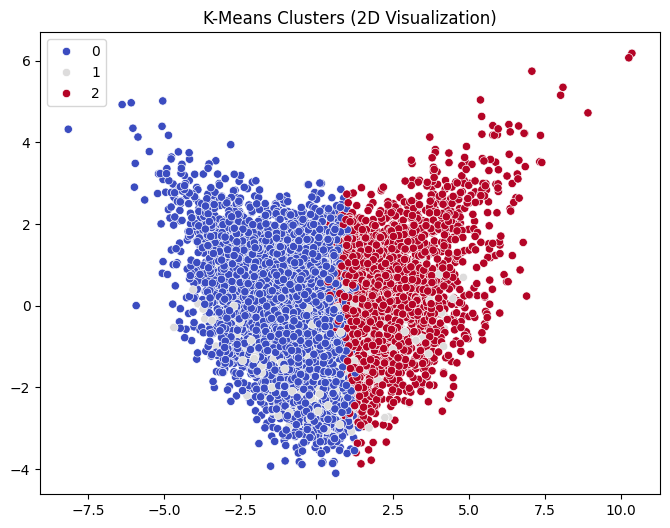

In [85]:
# Reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='coolwarm', legend='full')
plt.title('K-Means Clusters (2D Visualization)')
plt.show()


In [86]:
import catboost

0:	learn: 1.0503940	total: 72.1ms	remaining: 36s
100:	learn: 0.6687574	total: 2.49s	remaining: 9.84s
200:	learn: 0.5835075	total: 4.79s	remaining: 7.13s
300:	learn: 0.5163750	total: 11.2s	remaining: 7.4s
400:	learn: 0.4690152	total: 16s	remaining: 3.96s
499:	learn: 0.4269989	total: 20.6s	remaining: 0us
CatBoost Model Accuracy: 0.7358490566037735
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       723
         1.0       0.65      0.66      0.66       680
         2.0       0.77      0.76      0.77       717

    accuracy                           0.74      2120
   macro avg       0.73      0.73      0.73      2120
weighted avg       0.74      0.74      0.74      2120

Confusion Matrix:
 [[567 116  40]
 [110 449 121]
 [ 52 121 544]]


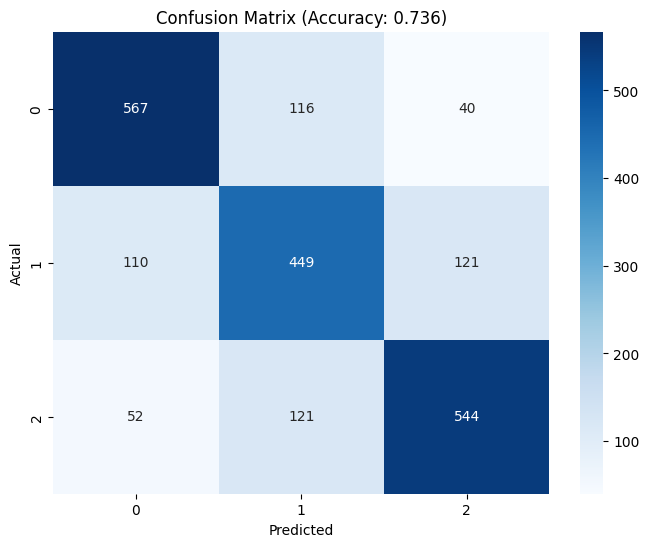

In [87]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500,         # Number of trees
    learning_rate=0.1,      # Step size
    depth=6,                # Depth of the trees
    l2_leaf_reg=3,          # L2 regularization
    random_seed=42,         # Seed for reproducibility
    verbose=100             # Display output every 100 iterations
)

# Fit the model on the training data
catboost_model.fit(X_train_res, y_train_res)

# Make predictions on the validation set
y_pred_catboost = catboost_model.predict(X_val_res)

# Evaluate the model
print("CatBoost Model Accuracy:", accuracy_score(y_val_res, y_pred_catboost))
print("Classification Report:\n", classification_report(y_val_res, y_pred_catboost))
print("Confusion Matrix:\n", confusion_matrix(y_val_res, y_pred_catboost))

conf_matrix_knn= confusion_matrix(y_val_res, y_pred_catboost)

accuracy= accuracy_score(y_val_res, y_pred_catboost)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Model Accuracy: 0.7320754716981132
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       723
         1.0       0.66      0.75      0.70       680
         2.0       0.82      0.57      0.67       717

    accuracy                           0.73      2120
   macro avg       0.74      0.73      0.73      2120
weighted avg       0.74      0.73      0.73      2120

Confusion Matrix:
 [[629  67  27]
 [102 513  65]
 [107 200 410]]


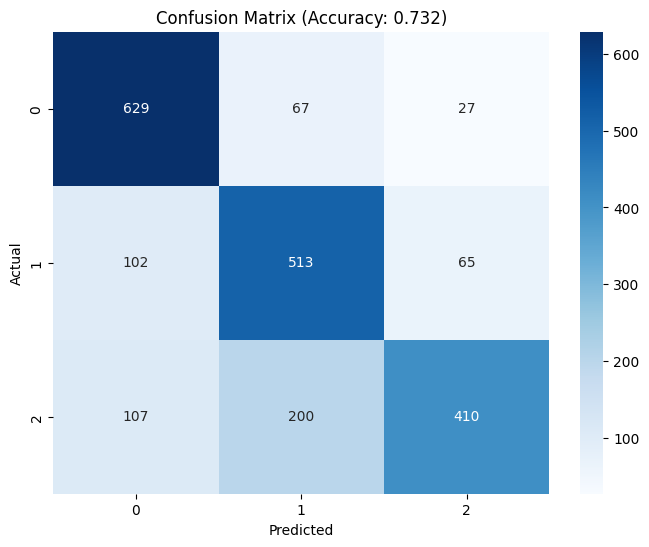

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,  # You can adjust this value
    weights='uniform',  # You can also try 'distance' for distance-based weighting
    algorithm='auto',  # Algorithm used to compute the nearest neighbors
    metric='minkowski'  # Distance metric to use
)

# Fit the model on the training data
knn_model.fit(X_train_res, y_train_res)

# Make predictions on the validation set
y_pred_knn = knn_model.predict(X_val_res)

# Evaluate the model
print("KNN Model Accuracy:", accuracy_score(y_val_res, y_pred_knn))
print("Classification Report:\n", classification_report(y_val_res, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val_res, y_pred_knn))

conf_matrix_knn= confusion_matrix(y_val_res, y_pred_knn)

accuracy= accuracy_score(y_val_res, y_pred_knn)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [89]:
import sklearn

In [90]:
print(sklearn.__version__)

1.5.2


In [91]:
pip install --upgrade scikit-learn


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Accuracy: 0.6617924528301887
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.68      0.67       723
         1.0       0.55      0.53      0.54       680
         2.0       0.76      0.77      0.76       717

    accuracy                           0.66      2120
   macro avg       0.66      0.66      0.66      2120
weighted avg       0.66      0.66      0.66      2120

Confusion Matrix:
 [[495 187  41]
 [191 358 131]
 [ 60 107 550]]


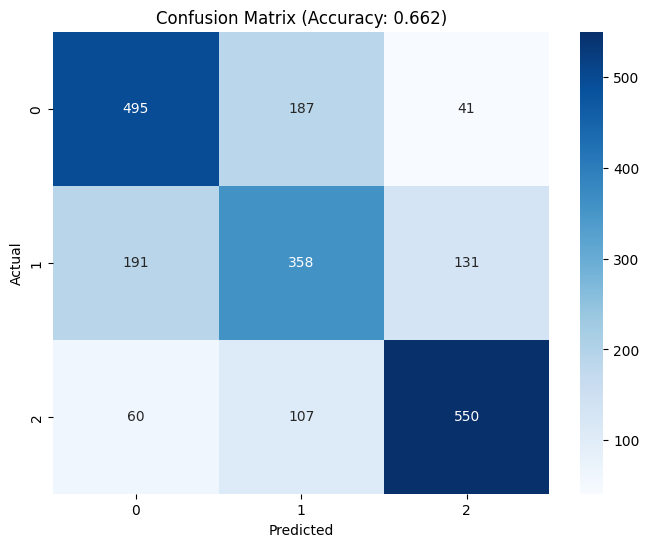

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the AdaBoost model (using the default base estimator)
adaboost_model = AdaBoostClassifier(
    n_estimators=500,          # Number of weak learners
    learning_rate=1.0,         # Step size
    random_state=42            # Seed for reproducibility
)

# Fit the model on the training data
adaboost_model.fit(X_train_res, y_train_res)

# Make predictions on the validation set
y_pred_adaboost = adaboost_model.predict(X_val_res)

# Evaluate the model
print("AdaBoost Model Accuracy:", accuracy_score(y_val_res, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_val_res, y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_val_res, y_pred_adaboost))

conf_matrix_adb= confusion_matrix(y_val_res, y_pred_adaboost)

accuracy= accuracy_score(y_val_res, y_pred_adaboost)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adb, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In-Match Ensemble Model Accuracy after dropping NaNs: 0.7594339622641509
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       723
         1.0       0.69      0.70      0.69       680
         2.0       0.79      0.75      0.77       717

    accuracy                           0.76      2120
   macro avg       0.76      0.76      0.76      2120
weighted avg       0.76      0.76      0.76      2120

Confusion Matrix:
 [[594  90  39]
 [ 99 475 106]
 [ 51 125 541]]


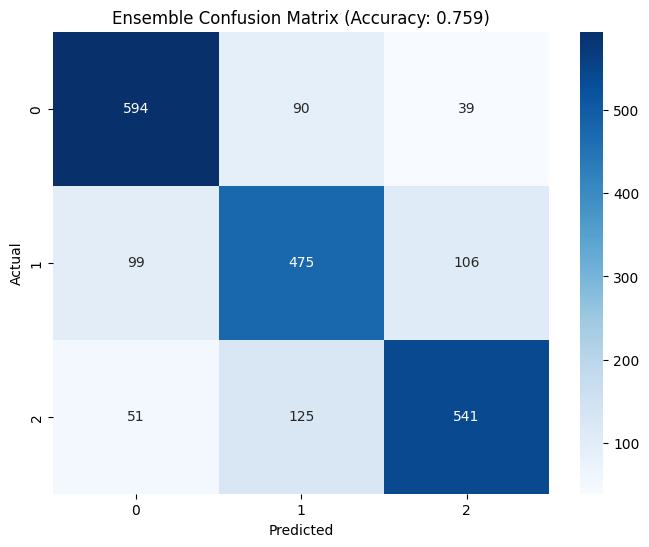

In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Individual models
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8477854281978608,
    gamma=0.09862548308625246,
    learning_rate=0.13668017086334516,
    max_depth=7,
    n_estimators=300,
    reg_alpha=0.05372634167140701,
    reg_lambda=1.460119158983572,
    subsample=0.8754298317847461,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)

# Ensemble using Voting Classifier (majority voting)
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model), ('lr', lr_model)],
    voting='soft'  # Use 'soft' for probabilistic averaging (preferred for classification)
)

# Train the ensemble model
ensemble_model.fit(X_train_res, y_train_res)

# Predict using the ensemble model
y_pred = ensemble_model.predict(X_val_res)

# Evaluate the model
accuracy = accuracy_score(y_val_res, y_pred)
print("In-Match Ensemble Model Accuracy after dropping NaNs:", accuracy)

report = classification_report(y_val_res, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_val_res, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title(f'Ensemble Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle

# Assuming these models are already initialized
models = {
    "XGBoost Model 1": xgb_model_1,
    "XGBoost Model 2": xgb_model_2,
    "Logistic Regression": lr_model,
    "SVC": svc_model,
    "KNN": knn_model,
    "AdaBoost": adaboost_model,
    "Ensemble Model": ensemble_model
}

# 1. Split the data (assuming X_in_match, y_in_match is your dataset)
X_train, X_test, y_train, y_test = train_test_split(X_in_match, y_in_match, test_size=0.3, random_state=42)

# 2. Binarize the output for multiclass (One-vs-Rest)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))  # e.g., classes=[0, 1, 2]
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_train_bin.shape[1]

plt.figure(figsize=(10, 8))
colors = cycle(["blue", "green", "red"])  # Color cycle for each class

# 3. Loop through the models, train, predict, and plot PR for each model and class
for model_name, model in models.items():
    model.fit(X_train, y_train_bin)  # Fit the model on binarized labels

    # Predict probabilities for each class
    y_pred_prob = model.predict_proba(X_test)

    # Plot PR curve for each class
    for i, color in zip(range(n_classes), colors):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
        average_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

        # Plot Precision-Recall curve for the current class
        plt.plot(recall, precision, color=color, lw=2, label=f'{model_name} (Class {i}) AP = {average_precision:.2f}')

# 4. Plotting details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison for Multiclass")
plt.legend(loc="lower left")
plt.show()


XGBoostError: [04:53:34] /workspace/include/xgboost/objective.h:101: multioutput is not supported by the current objective function
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dbbc) [0x7afd0082dbbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5c2982) [0x7afd00bc2982]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5c2ad9) [0x7afd00bc2ad9]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5c92a2) [0x7afd00bc92a2]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5cabbd) [0x7afd00bcabbd]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7afd0073742f]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7afd60422e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7afd6041f493]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7afd604483e9]



<Figure size 1000x800 with 0 Axes>

In [180]:
val_X_columns =X_train_res.columns

In [181]:
print(val_X_columns)

Index(['MatchWeek', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       ...
       'AwayTeam_Southampton', 'AwayTeam_Stoke', 'AwayTeam_Sunderland',
       'AwayTeam_Swansea', 'AwayTeam_Tottenham', 'AwayTeam_Watford',
       'AwayTeam_West Brom', 'AwayTeam_West Ham', 'AwayTeam_Wigan',
       'AwayTeam_Wolves'],
      dtype='object', length=106)


In [219]:
# Getting dummy columns
dummy_columns =X_train_res.columns[X.columns.str.startswith('HomeTeam_') | X.columns.str.startswith('AwayTeam_')].tolist()


In [221]:
model_and_dummy_columns = (ensemble_model, dummy_columns)

# Saving the model and the dummy columns
joblib.dump(model_and_dummy_columns, 'ensemble_best_model_teams.pkl')

['ensemble_best_model_teams.pkl']

In [222]:
def predict_result(model, HomeTeam, AwayTeam, year, month, mWeek, HTHG, HTAG, HShots, AShots, HShotsOT, AShotsOT, BHome, BDraw, BAway, Hform, Aform, val_X_columns, dummy_columns):
    # Initialize a DataFrame with zeros
    data = {col: [0] for col in val_X_columns}
    dataframe = pd.DataFrame(data)

    # Error handling for teams not in the dummy columns
    home_team_dummy = f'HomeTeam_{HomeTeam}'
    away_team_dummy = f'AwayTeam_{AwayTeam}'

    if home_team_dummy not in dummy_columns or away_team_dummy not in dummy_columns:
        return f"Error: One or both teams ({HomeTeam}, {AwayTeam}) not found in the model."

    # Set specific input values
    dataframe['MatchWeek'] = mWeek
    dataframe['HalfTimeHomeTeamGoals'] = HTHG
    dataframe['HalfTimeAwayTeamGoals'] = HTAG
    dataframe['HomeTeamShots'] = HShots
    dataframe['AwayTeamShots'] = AShots
    dataframe['HomeTeamShotsOnTarget'] = HShotsOT
    dataframe['AwayTeamShotsOnTarget'] = AShotsOT
    dataframe['B365HomeTeam'] = BHome
    dataframe['B365Draw'] = BDraw
    dataframe['B365AwayTeam'] = BAway
    dataframe['year'] = year
    dataframe['month'] = month
    dataframe['HomeTeamForm'] = Hform
    dataframe['AwayTeamForm'] = Aform
    dataframe[home_team_dummy] = 1
    dataframe[away_team_dummy] = 1







    # Reorder DataFrame to match the model input
    dataframe = dataframe[val_X_columns]

    # Predict the result
    prediction = model.predict_proba(dataframe)

    return prediction


In [223]:
import joblib

In [224]:
# Example input values for all required parameters
HomeTeam = 'Man City'
AwayTeam = 'Luton'
year = 2023
month = 10
mWeek = 2  # Match week example
HTHG = 1  # Half-time home goals
HTAG = 0  # Half-time away goals
HShots = 7  # Home team shots
AShots = 5  # Away team shots
HShotsOT = 8  # Home team shots on target
AShotsOT = 2  # Away team shots on target
BHome = 1.57  # Betting odds for home team
BDraw = 4.33 # Betting odds for draw
BAway = 5.50 # Betting odds for away team
Hform = 15  # Home team form points
Aform = 13 # Away team form points

# Assuming `model` is already loaded and `val_X_columns` and `dummy_columns` are defined
prediction = predict_result(
    model=ensemble_model, #xgb_model_2
    HomeTeam=HomeTeam,
    AwayTeam=AwayTeam,
    year=year,
    month=month,
    mWeek=mWeek,
    HTHG=HTHG,
    HTAG=HTAG,
    HShots=HShots,
    AShots=AShots,
    HShotsOT=HShotsOT,
    AShotsOT=AShotsOT,
    BHome=BHome,
    BDraw=BDraw,
    BAway=BAway,
    Hform=Hform,
    Aform=Aform,
    val_X_columns=val_X_columns,
    dummy_columns=dummy_columns
)

# Output the prediction
print("Prediction:", prediction)


Prediction: [[0.1328897  0.39299586 0.47411445]]
